# D7059E

*   Jacob Yousif
*   Donato Scarano


## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
!pip install --upgrade threadpoolctl 

In [3]:
%%capture
!pip install umap-learn wordcloud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Loading

In [5]:
df = pd.read_parquet('datasets/Vectorized15SentenceSegmentsWithEmbeddings.parquet')
main = df.copy()

In [6]:
df.dropna(inplace=True)

In [7]:
print('Length of the dataframe is:', str(len(df)))

Length of the dataframe is: 28836


In [8]:
print(f"Does the DataFrame have any NaN values? {df.isna().sum().sum()}")

Does the DataFrame have any NaN values? 0


In [9]:
has_nan = df.isnull().values.any()
print(f"Are there any NaN values in the DataFrame? {has_nan}")

Are there any NaN values in the DataFrame? False


In [10]:
plots_dir = '8_plots/'
plots_dir = 'v_2/'

In [11]:
def write(file_name, latex_table):
    with open(file_name, 'w') as f:
        f.write(latex_table)

## Style Analysis

In [12]:
df.head()

Book       Author    Genre  Publish-Year  Average-Rating  \
0  Sense And Sensibility  Jane Austen  Romance          1811            4.08   
1  Sense And Sensibility  Jane Austen  Romance          1811            4.08   
2  Sense And Sensibility  Jane Austen  Romance          1811            4.08   
3  Sense And Sensibility  Jane Austen  Romance          1811            4.08   
4  Sense And Sensibility  Jane Austen  Romance          1811            4.08   

   AuthorCode  AverageWordLength  AverageSentenceLengthByWord  \
0           0           6.315789                    26.800000   
1           0           6.294821                    37.933333   
2           0           6.331492                    24.733333   
3           0           6.470852                    29.933333   
4           0           6.735849                    20.933333   

   AverageSyllablePerWord  SpecialCharactersCount  ...  FleschReadingEase  \
0                1.968586                0.000439  ...              64.44   
1                1.940711                0.001916  ...              54.39   
2                1.977901                0.004239  ...              68.60   
3                2.048673                0.002263  ...              58.21   
4                2.194969                0.003071  ...              60.04   

   FleschKincaidGradeLevel  DaleChallReadability  GunningFog  \
0                     10.1             25.760267       12.13   
1                     14.0             28.428606       16.07   
2                      8.5             25.257014       10.82   
3                     10.5             27.036251       12.30   
4                      9.8             24.674952       12.17   

   AverageSentenceLengthByChar  Sentiment  \
0                   151.000000   0.147207   
1                   207.800000   0.119557   
2                   140.600000   0.124122   
3                   175.800000   0.247345   
4                   129.333333   0.169444   

                                                Text  \
0  CHAPTER I. The family of Dashwood had long bee...   
1  By his own marriage, likewise, which happened ...   
2  He survived his uncle no longer; and ten thous...   
3  “Yes, he would give them three thousand pounds...   
4  Marianne’s abilities were, in many respects, q...   

                                            Pre-Text  \
0  chapter family dashwood long settled sussex es...   
1  marriage likewise happened soon afterwards add...   
2  survived uncle longer ten thousand pounds incl...   
3  yes would give three thousand pounds would lib...   
4  mariannes abilities many respects quite equal ...   

                                     Lemmatized-Text  \
0  chapter family dashwood long settle sussex est...   
1  marriage likewise happen soon afterwards add w...   
2  survive uncle longer ten thousand pound includ...   
3  yes would give three thousand pound would libe...   
4  mariannes ability many respect quite equal eli...   

                                          Embeddings  
0  [0.057984795, 0.08722327, 0.07592374, -0.10736...  
1  [0.05164058, 0.04184325, 0.031200934, -0.10265...  
2  [0.039218742, 0.041709043, 0.036968317, -0.117...  
3  [0.087891296, 0.026678447, 0.04497105, -0.1026...  
4  [0.061428584, 0.092939295, 0.04303288, -0.0906...  

[5 rows x 31 columns]

In [13]:
df.describe()

Publish-Year  Average-Rating    AuthorCode  AverageWordLength  \
count  28836.000000    28836.000000  28836.000000       28836.000000   
mean    1873.400090        3.914407      7.883375           5.625329   
std       25.805778        0.252139      4.378727           0.636701   
min     1811.000000        2.780000      0.000000           2.000000   
25%     1861.000000        3.790000      4.000000           5.204145   
50%     1871.000000        3.960000      8.000000           5.681523   
75%     1897.000000        4.090000     12.000000           6.090278   
max     1924.000000        4.290000     15.000000           8.220000   

       AverageSentenceLengthByWord  AverageSyllablePerWord  \
count                 28836.000000            28836.000000   
mean                     20.660614                1.711583   
std                       8.549998                0.188764   
min                       1.133333                1.000000   
25%                      14.866667                1.577465   
50%                      19.733333                1.705165   
75%                      25.400000                1.837838   
max                     331.600000                2.636364   

       SpecialCharactersCount  PunctuationCount  FunctionalWordsCount  \
count            28836.000000      28836.000000          28836.000000   
mean                 0.003154          0.031006              0.120095   
std                  0.004908          0.014442              0.009961   
min                  0.000000          0.000000              0.000000   
25%                  0.000724          0.024609              0.114062   
50%                  0.001927          0.028743              0.120193   
75%                  0.004005          0.034238              0.126251   
max                  0.294118          0.394737              0.183007   

       TypeTokenRatio  ...  YulesCharacteristicK  SimpsonsIndex  \
count    28836.000000  ...          28836.000000   28836.000000   
mean         0.524275  ...            753.483003       0.924583   
std          0.056855  ...             94.686443       0.009854   
min          0.206099  ...            470.209710       0.462451   
25%          0.486760  ...            732.407656       0.922947   
50%          0.522638  ...            750.537807       0.924897   
75%          0.560284  ...            769.976645       0.926711   
max          0.909091  ...           5141.776938       0.952819   

       BrunetsMeasureW  ShannonEntropy  FleschReadingEase  \
count     28836.000000    28836.000000       28836.000000   
mean          5.590406        4.235887          76.280151   
std           0.609058        0.107138          11.601794   
min           2.149114        1.502394        -172.770000   
25%           5.179159        4.181034          69.210000   
50%           5.550824        4.227413          77.470000   
75%           5.949489        4.282520          84.270000   
max           9.465489        4.935651         120.210000   

       FleschKincaidGradeLevel  DaleChallReadability    GunningFog  \
count             28836.000000          28836.000000  28836.000000   
mean                  7.148925             23.931230      9.377539   
std                   3.241692              2.361554      3.312991   
min                  -3.100000             17.935973      0.400000   
25%                   4.900000             22.343997      7.047500   
50%                   6.700000             23.657948      8.900000   
75%                   8.900000             25.220282     11.180000   
max                 101.300000            107.673633    104.650000   

       AverageSentenceLengthByChar     Sentiment  
count                 28836.000000  28836.000000  
mean                    114.316212      0.079517  
std                      48.676561      0.111501  
min                       1.600000     -1.000000  
25%                      81.600000      0.012537  
50%                     108.666667      0.078928  

In [14]:
df.columns

Index(['Book', 'Author', 'Genre', 'Publish-Year', 'Average-Rating',
       'AuthorCode', 'AverageWordLength', 'AverageSentenceLengthByWord',
       'AverageSyllablePerWord', 'SpecialCharactersCount', 'PunctuationCount',
       'FunctionalWordsCount', 'TypeTokenRatio', 'HonoreMeasureR', 'Hapax',
       'SichelesMeasureS', 'Dihapax', 'YulesCharacteristicK', 'SimpsonsIndex',
       'BrunetsMeasureW', 'ShannonEntropy', 'FleschReadingEase',
       'FleschKincaidGradeLevel', 'DaleChallReadability', 'GunningFog',
       'AverageSentenceLengthByChar', 'Sentiment', 'Text', 'Pre-Text',
       'Lemmatized-Text', 'Embeddings'],
      dtype='object')

In [15]:
embeddings_matrix = np.stack(df['Embeddings'].values)
pca = PCA(n_components=50)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

In [16]:
numerical = ['Average-Rating', 'AverageWordLength', 'AverageSentenceLengthByWord',
                      'AverageSyllablePerWord', 'SpecialCharactersCount', 'PunctuationCount',
                      'FunctionalWordsCount', 'TypeTokenRatio', 'HonoreMeasureR', 'Hapax',
                      'SichelesMeasureS', 'Dihapax', 'YulesCharacteristicK', 'SimpsonsIndex',
                      'BrunetsMeasureW', 'ShannonEntropy', 'FleschReadingEase',
                      'FleschKincaidGradeLevel', 'DaleChallReadability', 'GunningFog',
                      'AverageSentenceLengthByChar', 'Sentiment']

In [17]:
df_numerical = df[numerical].copy()

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [19]:
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

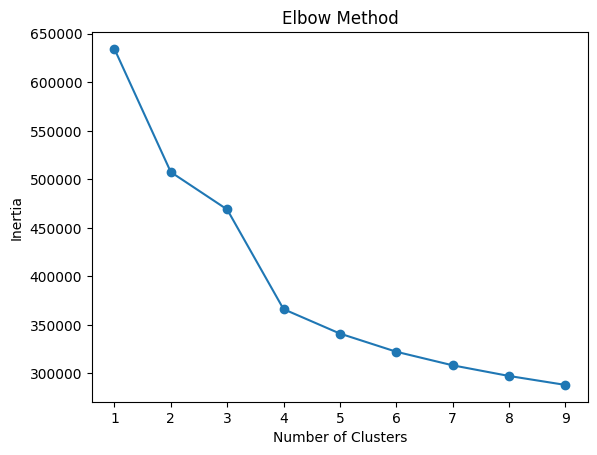

In [20]:
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.savefig(f'{plots_dir}em.png', bbox_inches='tight')
plt.show()

In [21]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

In [22]:
df_numerical['ClusterK'] = clusters  
cluster_props = df_numerical.groupby('ClusterK').mean()

In [23]:
df['ClusterK'] = clusters
df_numerical['Cluster'] = df['ClusterK']

In [24]:
academic_palette = sns.color_palette('Set1', n_colors=df['ClusterK'].nunique())

In [25]:
cluster_props

Average-Rating  AverageWordLength  AverageSentenceLengthByWord  \
ClusterK                                                                   
0               3.912206           5.674096                    20.858550   
1               3.939709           5.205239                    12.662800   
2               3.882890           6.120073                    31.783836   

          AverageSyllablePerWord  SpecialCharactersCount  PunctuationCount  \
ClusterK                                                                     
0                       1.719956                0.002624          0.028302   
1                       1.584169                0.004553          0.040284   
2                       1.876615                0.002364          0.023872   

          FunctionalWordsCount  TypeTokenRatio  HonoreMeasureR     Hapax  ...  \
ClusterK                                                                  ...   
0                     0.120566        0.519541      740.627573  0.001260  ...   
1                     0.118352        0.555969      682.870103  0.003364  ...   
2                     0.121523        0.489406      785.544787  0.000818  ...   

          YulesCharacteristicK  SimpsonsIndex  BrunetsMeasureW  \
ClusterK                                                         
0                   754.349134       0.924518         5.517576   
1                   755.302076       0.924338         5.792553   
2                   748.827555       0.925088         5.467489   

          ShannonEntropy  FleschReadingEase  FleschKincaidGradeLevel  \
ClusterK                                                               
0               4.225513          76.461454                 7.087106   
1               4.272104          86.594953                 4.068555   
2               4.207626          60.916052                11.755099   

          DaleChallReadability  GunningFog  AverageSentenceLengthByChar  \
ClusterK                                                                  
0                    23.947586    9.325371                   114.692269   
1                    21.701398    6.223183                    68.341130   
2                    27.123024   14.068370                   180.034595   

          Sentiment  
ClusterK             
0          0.079989  
1          0.070856  
2          0.090959  

[3 rows x 22 columns]

In [26]:
cluster_props.columns

Index(['Average-Rating', 'AverageWordLength', 'AverageSentenceLengthByWord',
       'AverageSyllablePerWord', 'SpecialCharactersCount', 'PunctuationCount',
       'FunctionalWordsCount', 'TypeTokenRatio', 'HonoreMeasureR', 'Hapax',
       'SichelesMeasureS', 'Dihapax', 'YulesCharacteristicK', 'SimpsonsIndex',
       'BrunetsMeasureW', 'ShannonEntropy', 'FleschReadingEase',
       'FleschKincaidGradeLevel', 'DaleChallReadability', 'GunningFog',
       'AverageSentenceLengthByChar', 'Sentiment'],
      dtype='object')

In [27]:
columns = ['Average-Rating', 'AverageWordLength', 'AverageSentenceLengthByWord', 'AverageSyllablePerWord',
           'SpecialCharactersCount', 'PunctuationCount', 'FunctionalWordsCount', 'TypeTokenRatio',
           'HonoreMeasureR', 'Hapax', 'SichelesMeasureS', 'Dihapax', 'YulesCharacteristicK',
           'SimpsonsIndex', 'BrunetsMeasureW', 'ShannonEntropy', 'FleschReadingEase',
           'FleschKincaidGradeLevel', 'DaleChallReadability', 'GunningFog', 'AverageSentenceLengthByChar',
           'Sentiment']
half_columns = len(columns) // 2
first_half_columns = columns[:half_columns]
second_half_columns = columns[half_columns:]
cluster_props_1 = cluster_props[first_half_columns]
cluster_props_2 = cluster_props[second_half_columns]
cluster_props_1 = cluster_props_1.round(1)
cluster_props_2 = cluster_props_2.round(1)

In [28]:
cluster_props_1

Average-Rating  AverageWordLength  AverageSentenceLengthByWord  \
ClusterK                                                                   
0                    3.9                5.7                         20.9   
1                    3.9                5.2                         12.7   
2                    3.9                6.1                         31.8   

          AverageSyllablePerWord  SpecialCharactersCount  PunctuationCount  \
ClusterK                                                                     
0                            1.7                     0.0               0.0   
1                            1.6                     0.0               0.0   
2                            1.9                     0.0               0.0   

          FunctionalWordsCount  TypeTokenRatio  HonoreMeasureR  Hapax  \
ClusterK                                                                
0                          0.1             0.5           740.6    0.0   
1                          0.1             0.6           682.9    0.0   
2                          0.1             0.5           785.5    0.0   

          SichelesMeasureS  
ClusterK                    
0                      0.1  
1                      0.1  
2                      0.1

In [29]:
latex_table = cluster_props_1.to_latex()
write(f'{plots_dir}cluster_props_1.txt', latex_table)

In [30]:
latex_table = cluster_props_2.to_latex()
write(f'{plots_dir}cluster_props_2.txt', latex_table)

In [31]:
latex_table = cluster_props.to_latex()
write(f'{plots_dir}cluster_props.txt', latex_table)

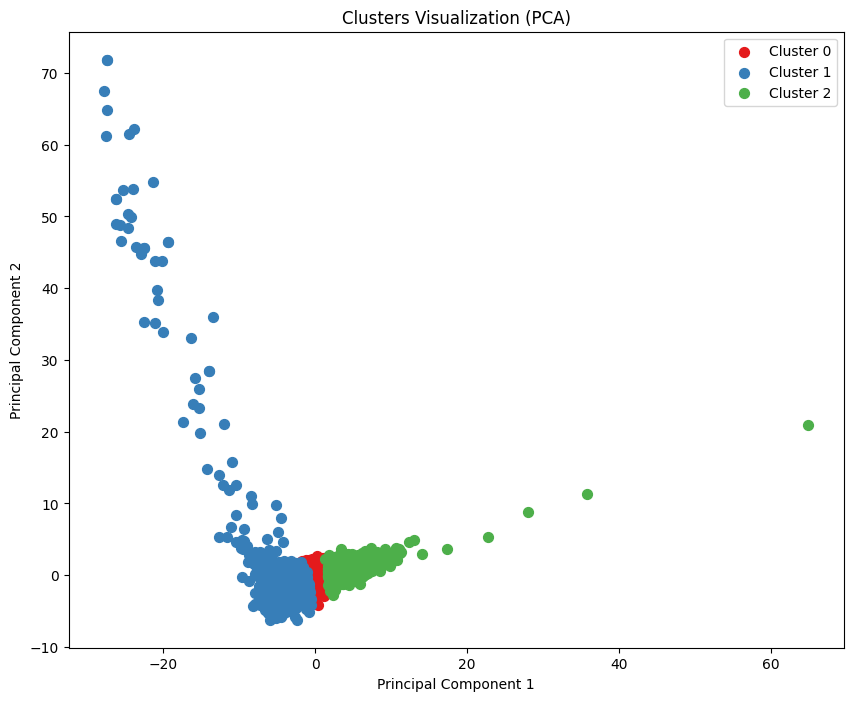

In [32]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


plt.figure(figsize=(10, 8))
for cluster in range(k):
    plt.scatter(df_pca[clusters == cluster, 0], df_pca[clusters == cluster, 1], 
                label=f'Cluster {cluster}', s=50, marker='o',
                color=academic_palette[cluster])  

plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.savefig(f'{plots_dir}cv.pdf', bbox_inches='tight')
plt.show()

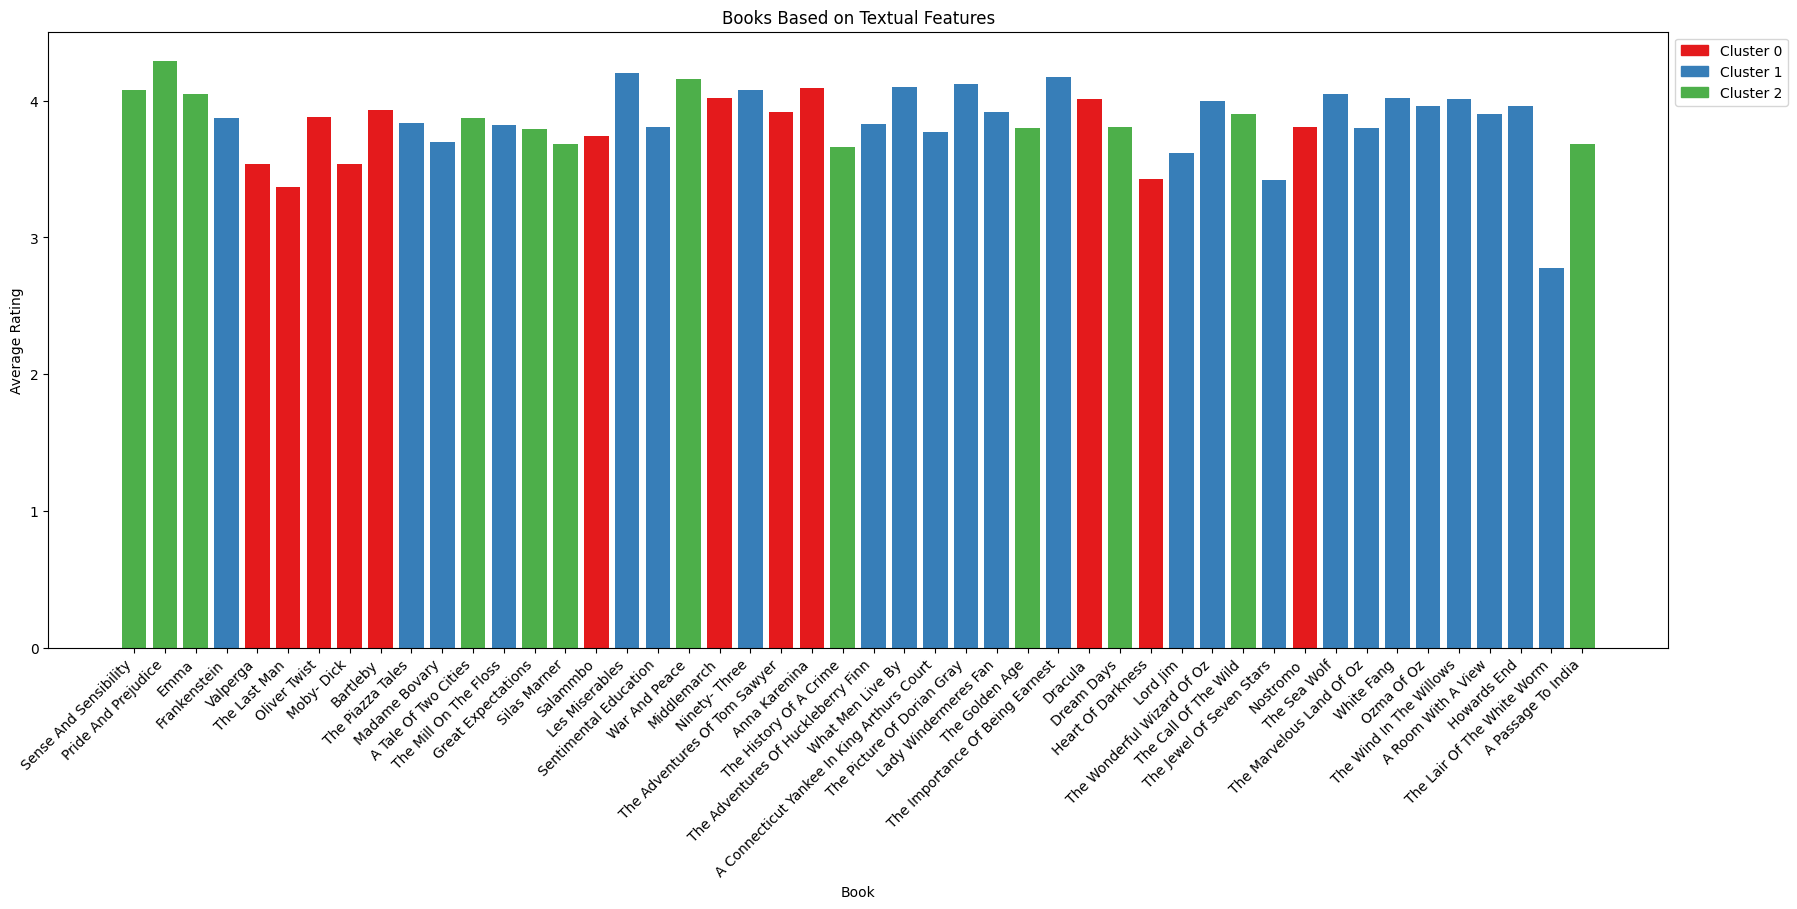

In [33]:
fig, ax = plt.subplots(figsize=(24, 8))


bar = ax.bar(df['Book'], df['Average-Rating'], color=[academic_palette[x] for x in df['ClusterK']])
ax.set_xlabel('Book')
ax.set_ylabel('Average Rating')
ax.set_title('Books Based on Textual Features')
plt.xticks(rotation=45, ha="right")

handles = [plt.Rectangle((0,0),1,1, color=academic_palette[i]) for i in range(len(academic_palette))]
legend = ax.legend(handles, [f'Cluster {i}' for i in range(len(academic_palette))], loc='upper left', bbox_to_anchor=(1,1))

plt.subplots_adjust(right=0.8)  
plt.savefig(f'{plots_dir}ctf.pdf', bbox_inches='tight')
plt.show()

In [34]:
idx = df.groupby(['Book'])['Average-Rating'].transform(max) == df['Average-Rating']

highest_rating_df = df[idx].drop_duplicates(subset=['Book'])
highest_rating_df.reset_index(drop=True, inplace=True)

In [35]:
selected_df = highest_rating_df[['ClusterK', 'Book', 'Author', 'Average-Rating']].copy()
selected_df.rename(columns={'ClusterK': 'Cluster'}, inplace=True)

In [36]:
sorted_df = selected_df.sort_values(by=['Cluster', 'Book'], ascending=[True, True])

In [37]:
sorted_df

Cluster                                        Book            Author  \
47        0                          A Passage To India     E. M. Forster   
22        0                               Anna Karenina       Leo Tolstoy   
31        0                                     Dracula       Bram Stoker   
33        0                           Heart Of Darkness     Joseph Conrad   
10        0                               Madame Bovary  Gustave Flaubert   
20        0                               Ninety- Three       Victor Hugo   
17        0                       Sentimental Education  Gustave Flaubert   
24        0          The Adventures Of Huckleberry Finn        Mark Twain   
36        0                        The Call Of The Wild       Jack London   
23        0                      The History Of A Crime       Victor Hugo   
46        0                  The Lair Of The White Worm       Bram Stoker   
40        0                    The Marvelous Land Of Oz     L. Frank Baum   
43        0                     The Wind In The Willows   Kenneth Grahame   
35        0                  The Wonderful Wizard Of Oz     L. Frank Baum   
18        0                               War And Peace       Leo Tolstoy   
41        0                                  White Fang       Jack London   
44        1                          A Room With A View     E. M. Forster   
45        1                                 Howards End     E. M. Forster   
28        1                        Lady Windermeres Fan       Oscar Wilde   
7         1                                  Moby- Dick   Herman Melville   
21        1                The Adventures Of Tom Sawyer        Mark Twain   
30        1             The Importance Of Being Earnest       Oscar Wilde   
25        1                            What Men Live By       Leo Tolstoy   
26        2  A Connecticut Yankee In King Arthurs Court        Mark Twain   
11        2                        A Tale Of Two Cities   Charles Dickens   
8         2                                    Bartleby   Herman Melville   
32        2                                  Dream Days   Kenneth Grahame   
2         2                                        Emma       Jane Austen   
3         2                                Frankenstein      Mary Shelley   
13        2                          Great Expectations   Charles Dickens   
16        2                              Les Miserables       Victor Hugo   
34        2                                    Lord Jim     Joseph Conrad   
19        2                                 Middlemarch      George Eliot   
38        2                                    Nostromo     Joseph Conrad   
6         2                                Oliver Twist   Charles Dickens   
42        2                                  Ozma Of Oz     L. Frank Baum   
1         2                         Pride And Prejudice       Jane Austen   
15        2                                    Salammbo  Gustave Flaubert   
0         2                       Sense And Sensibility       Jane Austen   
14        2                                Silas Marner      George Eliot   
29        2                              The Golden Age   Kenneth Grahame   
37        2                    The Jewel Of Seven Stars       Bram Stoker   
5         2                                The Last Man      Mary Shelley   
12        2                       The Mill On The Floss      George Eliot   
9         2                            The Piazza Tales   Herman Melville   
27        2                  The Picture Of Dorian Gray       Oscar Wilde   
39        2                                The Sea Wolf       Jack London   
4         2                                    Valperga      Mary Shelley   

    Average-Rating  
47            3.68  
22            4.09  
31            4.01  
33            3.43  
10            3.70  
20            4.08  
17            3.81  
24            3.83  
36            3.90  
23            3.66  

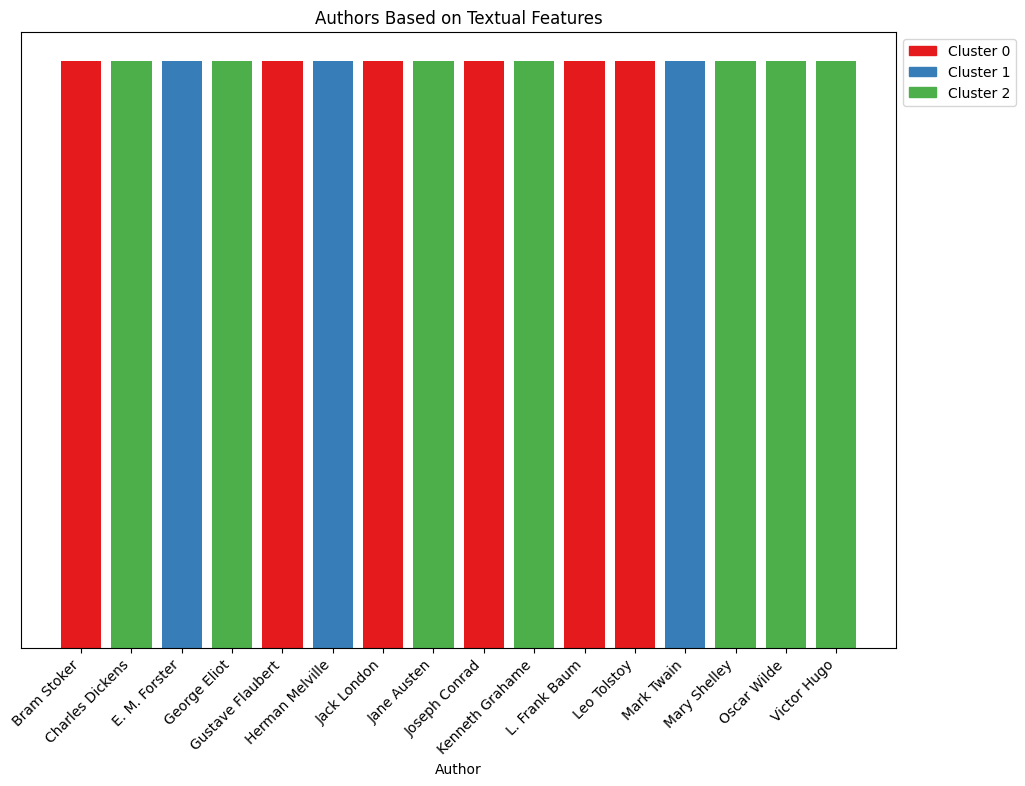

In [38]:
fig, ax = plt.subplots(figsize=(14, 8))


author_means = df.groupby('Author')['ClusterK'].first().reset_index()


bar = ax.bar(author_means['Author'], [1]*len(author_means), color=[academic_palette[x] for x in author_means['ClusterK']])
ax.set_xlabel('Author')
ax.set_ylabel('Cluster')
ax.set_title('Authors Based on Textual Features')
plt.xticks(rotation=45, ha="right")

ax.set_yticklabels([])
ax.tick_params(axis='y', left=False)
ax.yaxis.set_visible(False)


handles = [plt.Rectangle((0,0),1,1, color=academic_palette[i]) for i in range(len(academic_palette))]
legend = ax.legend(handles, [f'Cluster {i}' for i in range(len(academic_palette))], loc='upper left', bbox_to_anchor=(1,1))

plt.subplots_adjust(right=0.75)  
plt.savefig(f'{plots_dir}catf.png', bbox_inches='tight')
plt.show()

In [39]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_scaled)

In [40]:
df_numerical['t-SNE-1'] = tsne_results[:, 0]
df_numerical['t-SNE-2'] = tsne_results[:, 1]

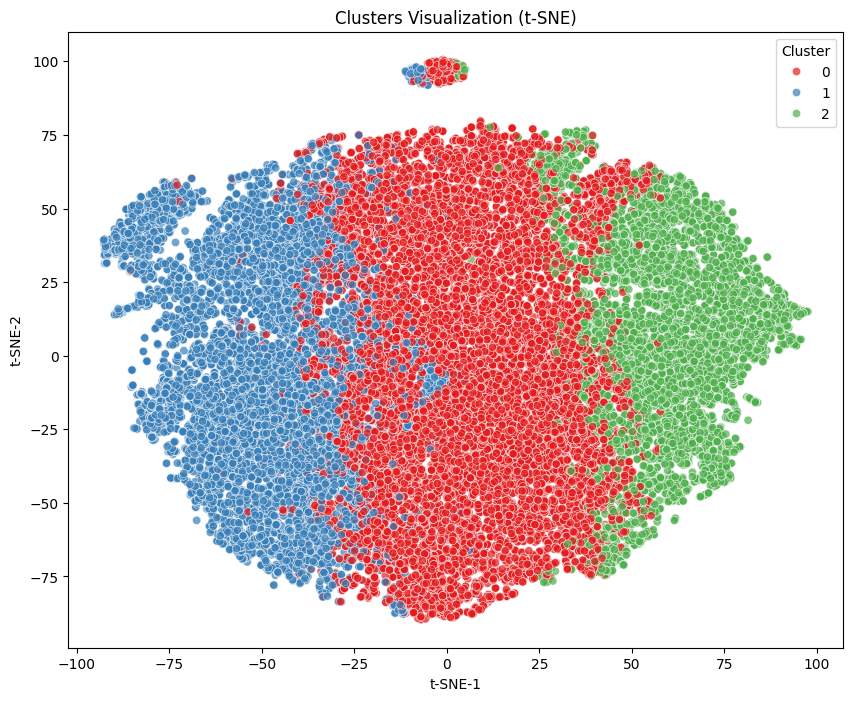

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="t-SNE-1", y="t-SNE-2",
    hue="Cluster",
    palette=sns.color_palette(academic_palette, k),  
    data=df_numerical,
    legend="full",
    alpha=0.7
)
plt.title('Clusters Visualization (t-SNE)')
plt.savefig(f'{plots_dir}tsne.png', bbox_inches='tight')
plt.show()

In [42]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[-0.00937604  0.07967651  0.02393375  0.04692376 -0.10747571 -0.18808716
   0.04790557 -0.0823832   0.17141133 -0.05933129 -0.04950169 -0.15685067
   0.00915813 -0.00654321 -0.12019398 -0.09791239  0.0134553  -0.01706981
   0.00786169 -0.01364842  0.00865543  0.00495153]
 [ 0.10079906 -0.66155907 -0.93330926 -0.67594282  0.28312186  0.64111857
  -0.17500691  0.55409399 -1.04258009  0.16910067  0.02834539  0.47836588
   0.01918214 -0.02480112  0.33154102  0.33813953  0.88879153 -0.94952328
  -0.9423338  -0.95141973 -0.94259715 -0.07785411]
 [-0.12486158  0.77710265  1.3030184   0.87456886 -0.16113297 -0.49405194
   0.14289164 -0.61430521  1.11755753 -0.1075971   0.07438272 -0.33005764
  -0.04932686  0.05139886 -0.20191855 -0.26358453 -1.32555379  1.42242662
   1.35370896  1.41719425  1.35223792  0.10179014]]


In [43]:
from collections import Counter
cluster_sizes = Counter(clusters)
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
Counter({0: 14069, 1: 8736, 2: 6031})


In [44]:
cluster_profiles = df_numerical.groupby('ClusterK').mean()
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
          Average-Rating  AverageWordLength  AverageSentenceLengthByWord  \
ClusterK                                                                   
0               3.912206           5.674096                    20.858550   
1               3.939709           5.205239                    12.662800   
2               3.882890           6.120073                    31.783836   

          AverageSyllablePerWord  SpecialCharactersCount  PunctuationCount  \
ClusterK                                                                     
0                       1.719956                0.002624          0.028302   
1                       1.584169                0.004553          0.040284   
2                       1.876615                0.002364          0.023872   

          FunctionalWordsCount  TypeTokenRatio  HonoreMeasureR     Hapax  ...  \
ClusterK                                                                  ...   
0                     0.120566        0.519541  

In [45]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette = silhouette_score(df_scaled, clusters)
davies_bouldin = davies_bouldin_score(df_scaled, clusters)
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.140467820767979
Davies-Bouldin Index: 1.9790847331206154


In [46]:
academic_palette = sns.color_palette('Set1', n_colors=df['Author'].nunique())

In [47]:
numerical_features = df[['Average-Rating', 'AverageWordLength', 'AverageSentenceLengthByWord',
                         'AverageSyllablePerWord', 'SpecialCharactersCount', 'PunctuationCount',
                         'FunctionalWordsCount', 'TypeTokenRatio', 'HonoreMeasureR', 'Hapax',
                         'SichelesMeasureS', 'Dihapax', 'YulesCharacteristicK', 'SimpsonsIndex',
                         'BrunetsMeasureW', 'ShannonEntropy', 'FleschReadingEase',
                         'FleschKincaidGradeLevel', 'DaleChallReadability', 'GunningFog',
                         'AverageSentenceLengthByChar', 'Sentiment']]

In [48]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numerical_features)

In [49]:
correlation_matrix = df[numerical_features.columns].corr()

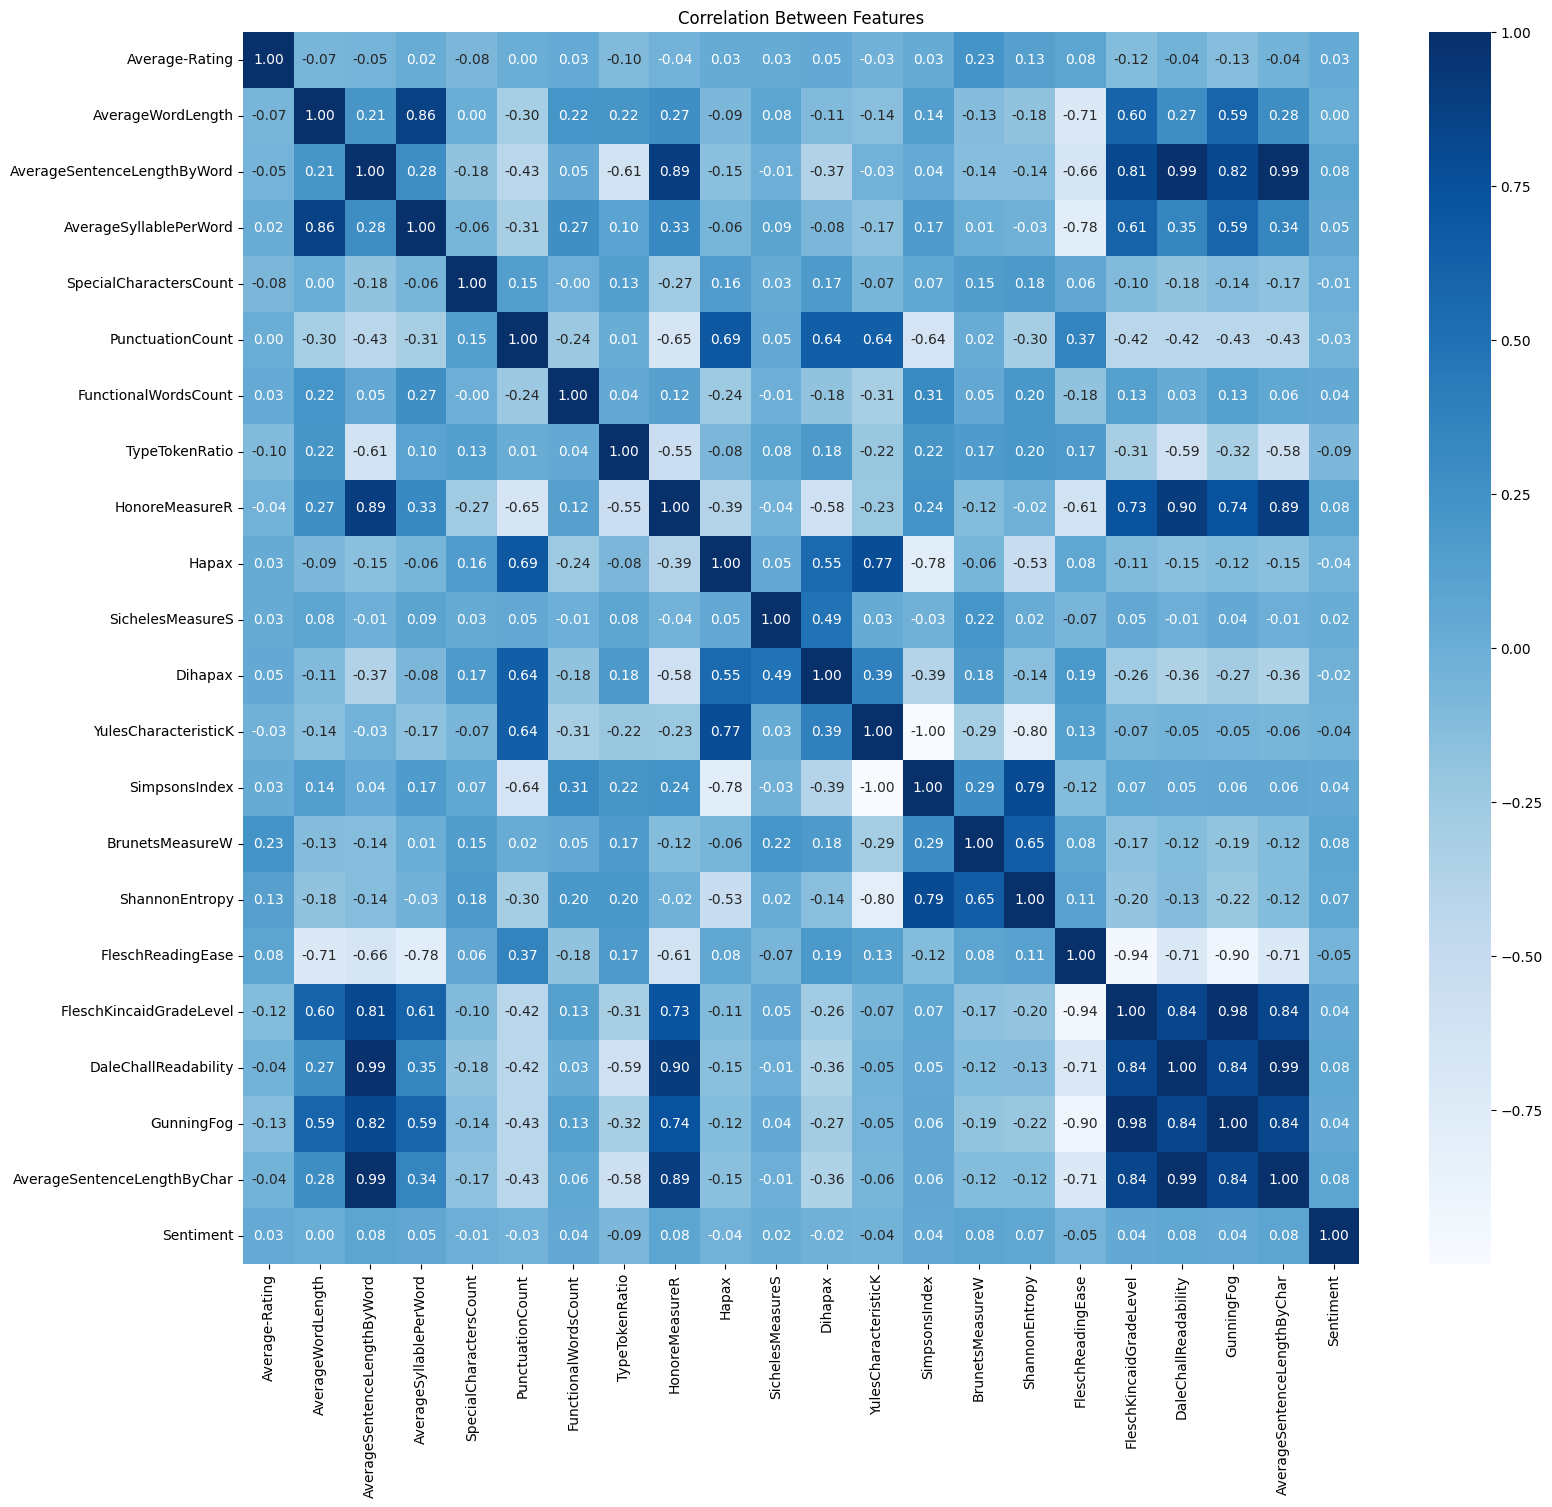

In [50]:
plt.figure(figsize=(18,16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

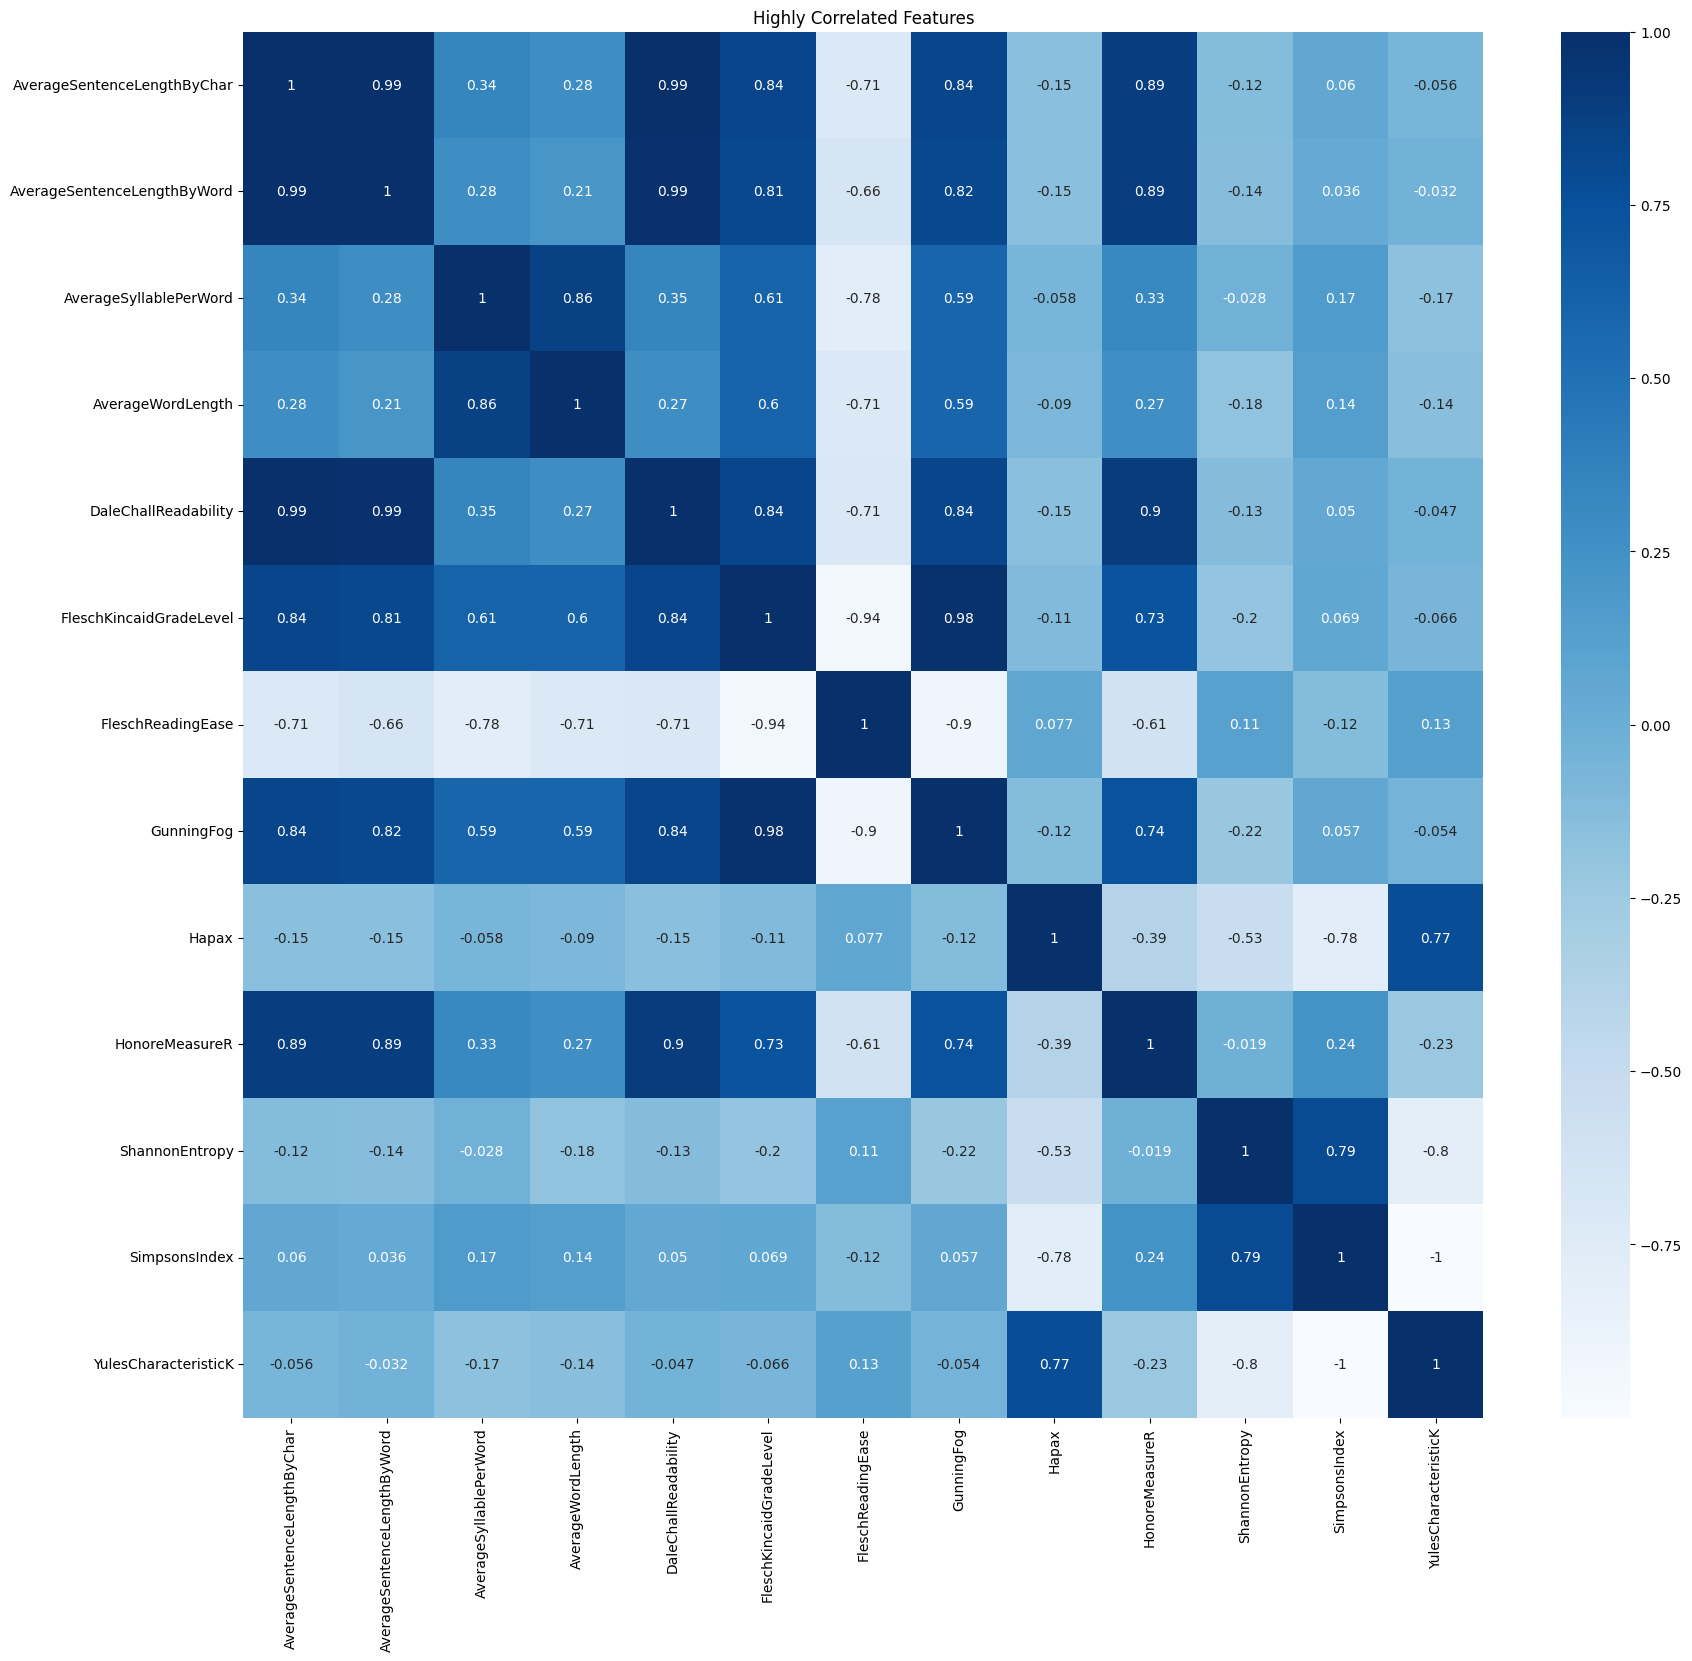

In [51]:
threshold = 0.75
high_corr_pairs = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
                   .stack()
                   .loc[lambda x: abs(x) > threshold])


features_to_include = np.unique(high_corr_pairs.index.get_level_values(0).tolist() + high_corr_pairs.index.get_level_values(1).tolist())
filtered_corr_matrix = df[features_to_include].corr()
plt.figure(figsize=(20, 18))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='Blues', center=0)
plt.title('Highly Correlated Features')
plt.savefig(f'{plots_dir}hcf.pdf', bbox_inches='tight')
plt.show()

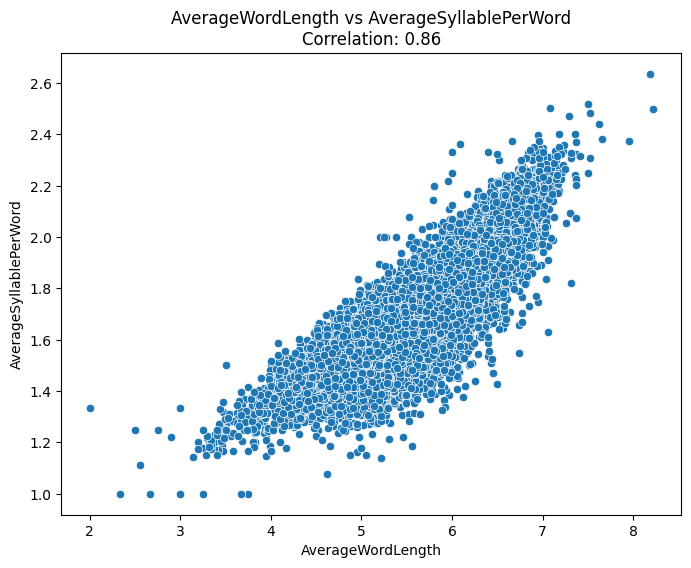

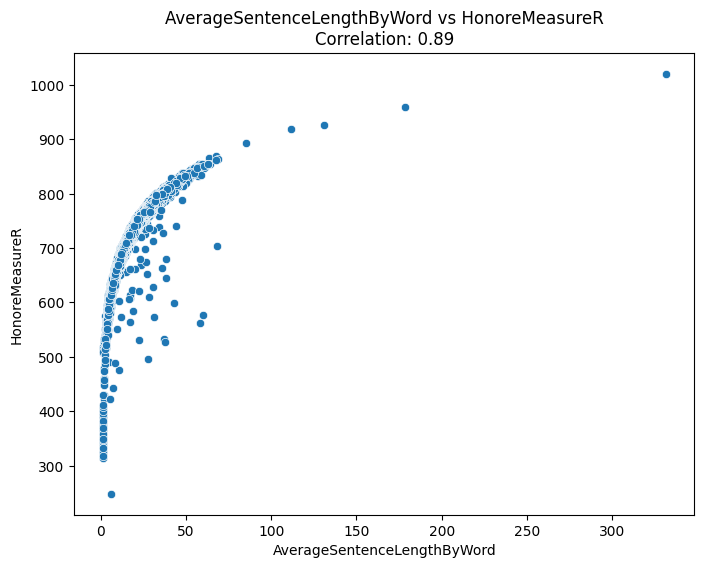

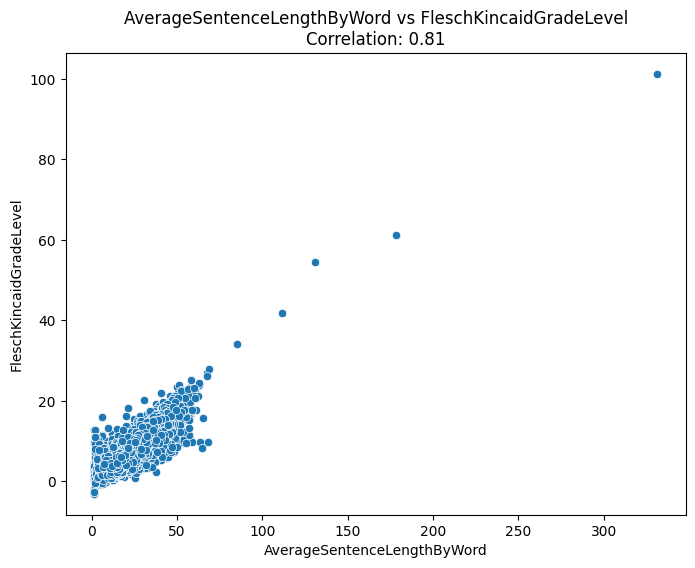

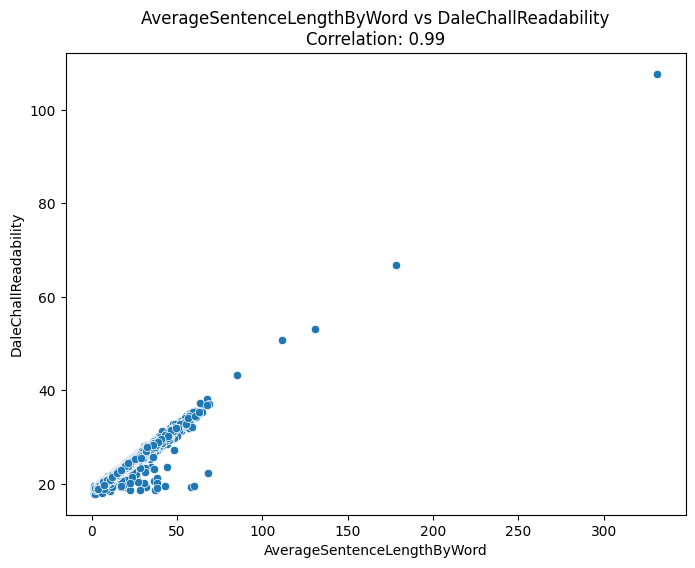

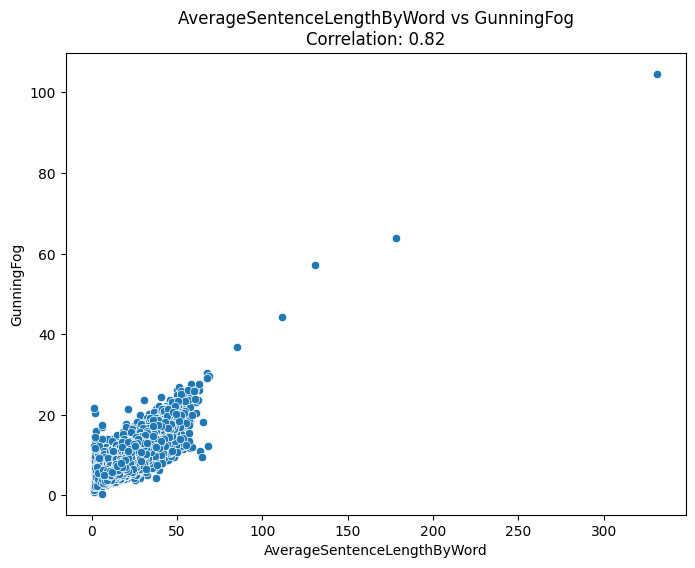

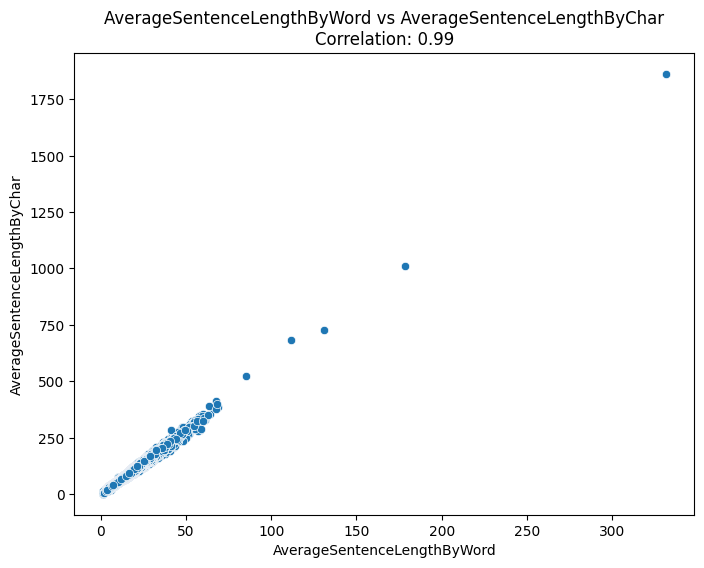

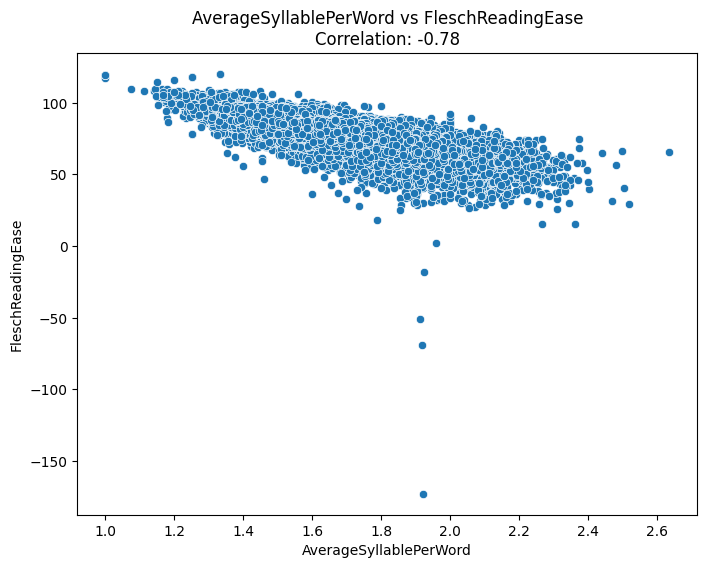

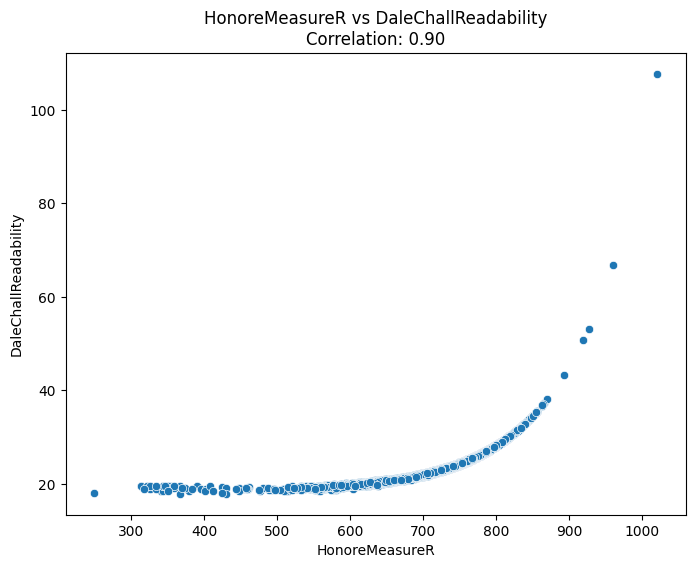

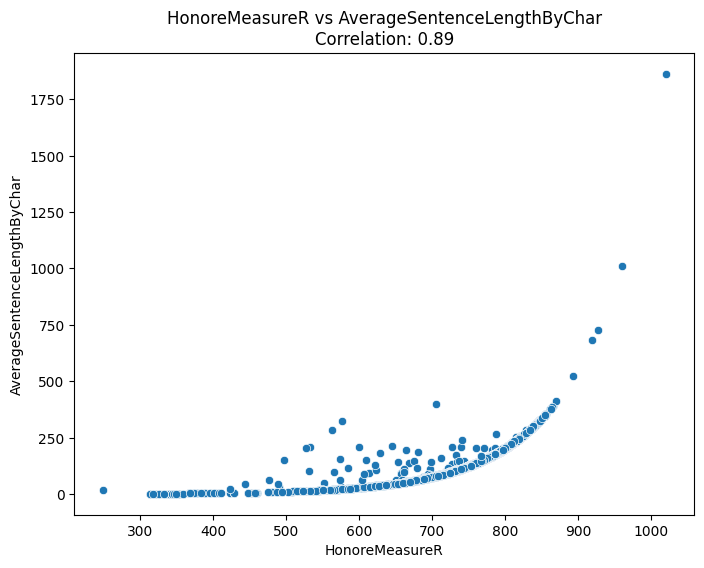

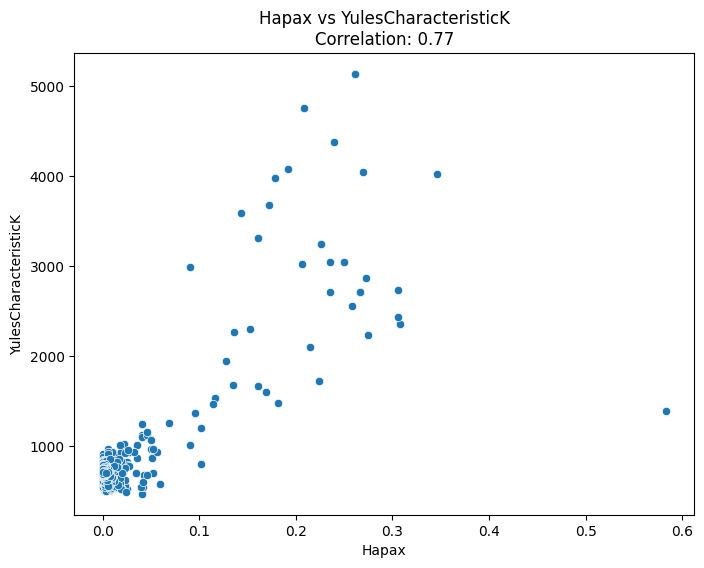

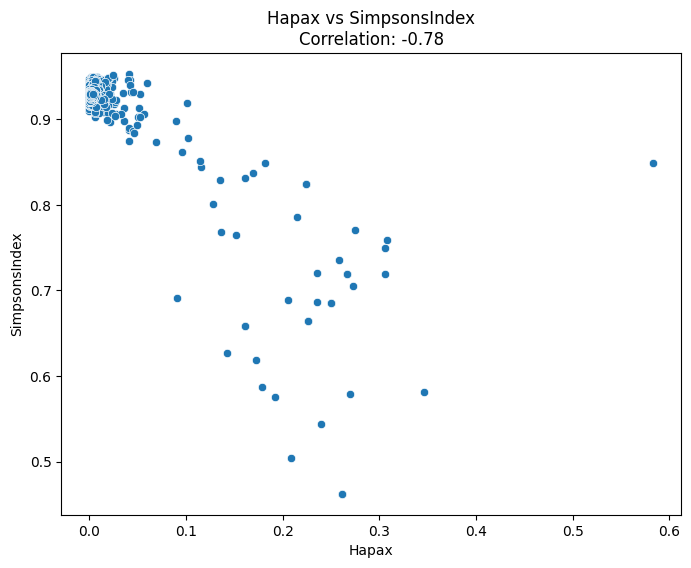

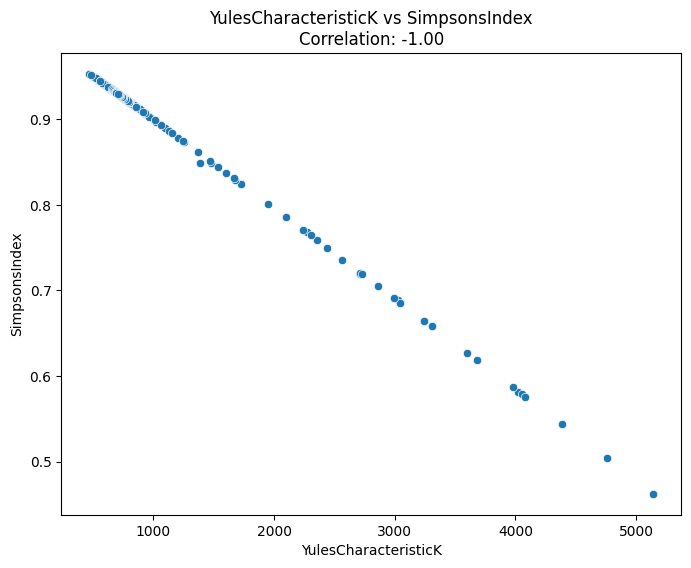

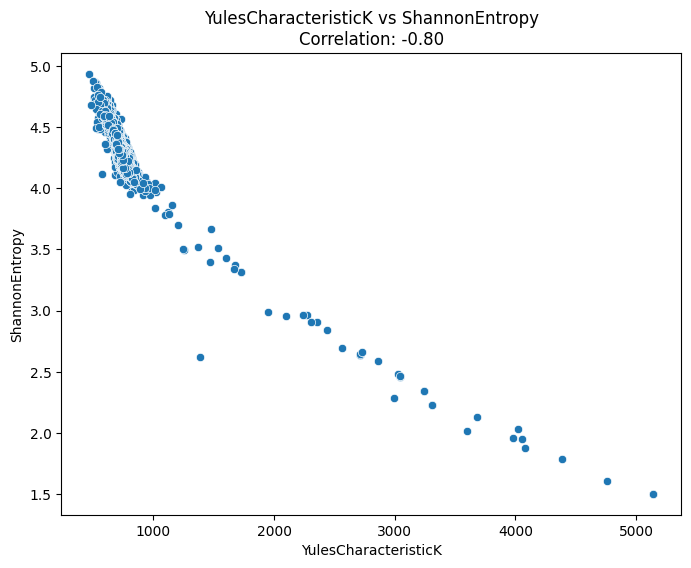

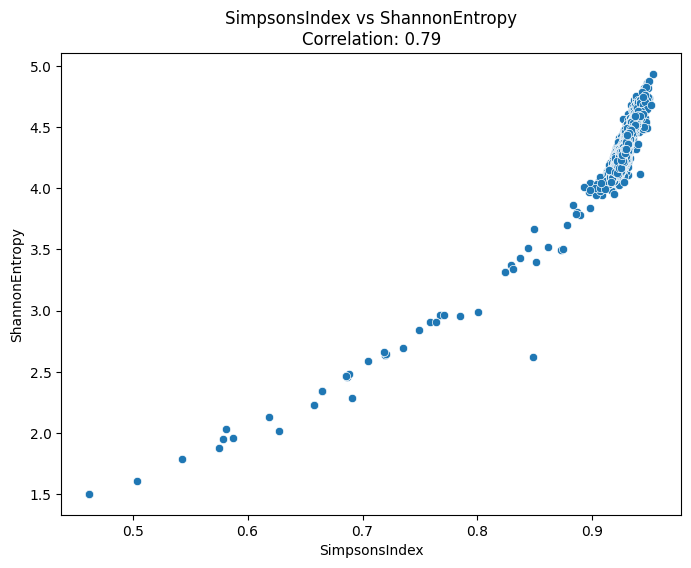

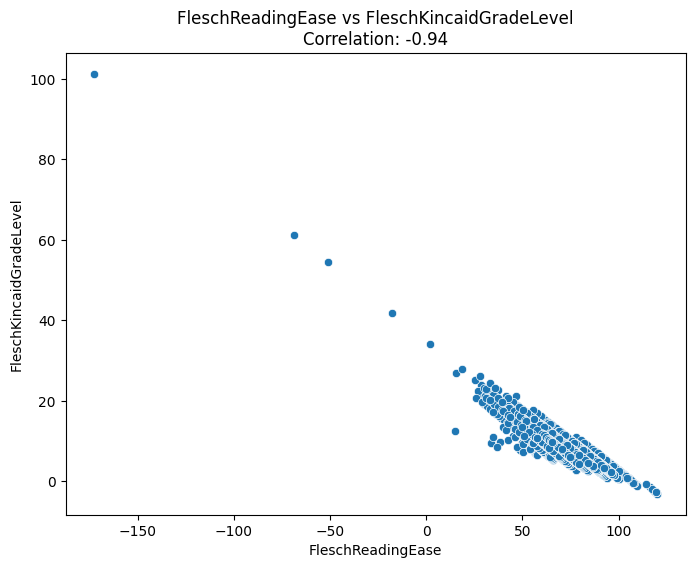

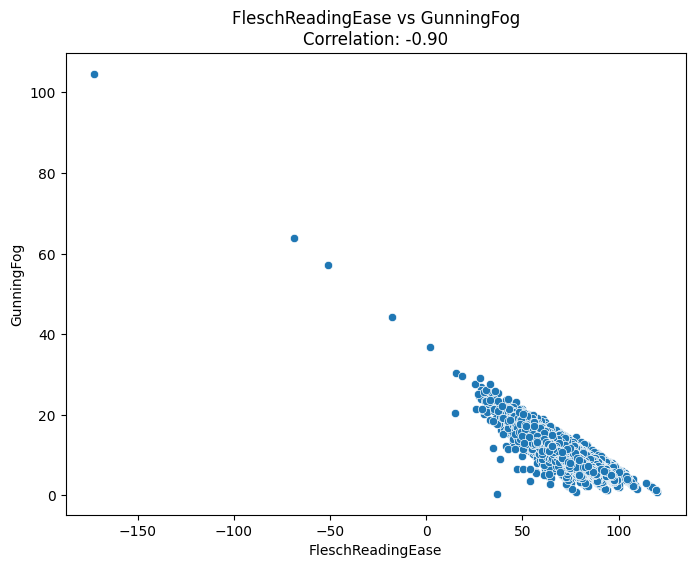

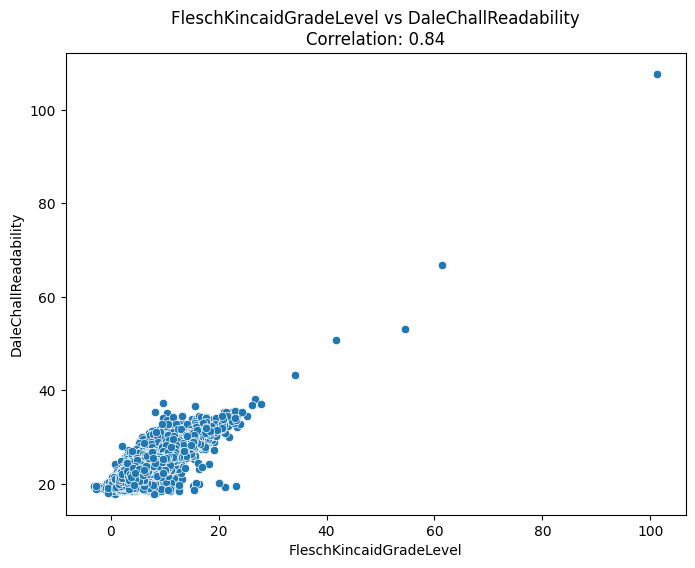

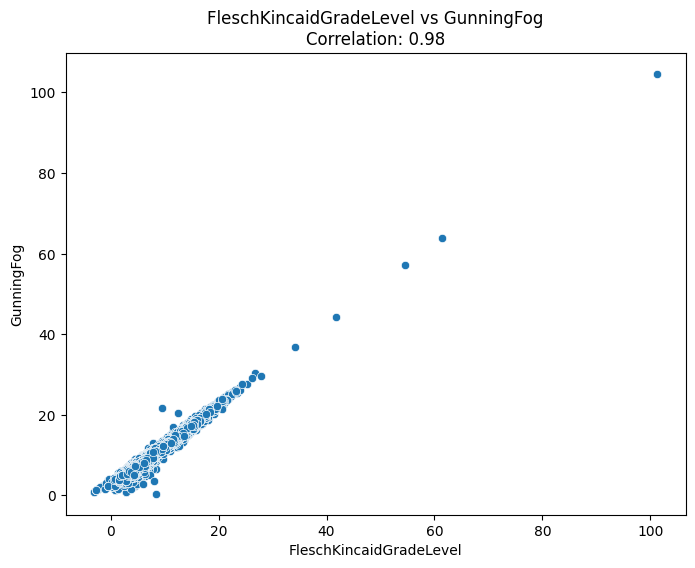

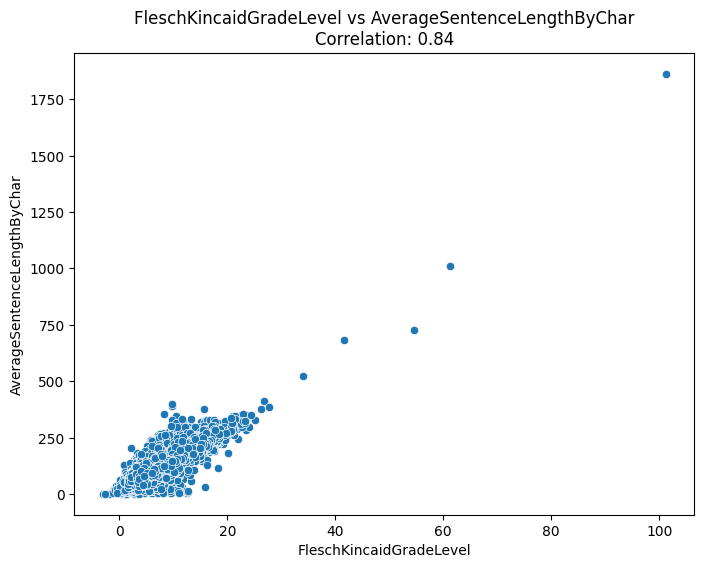

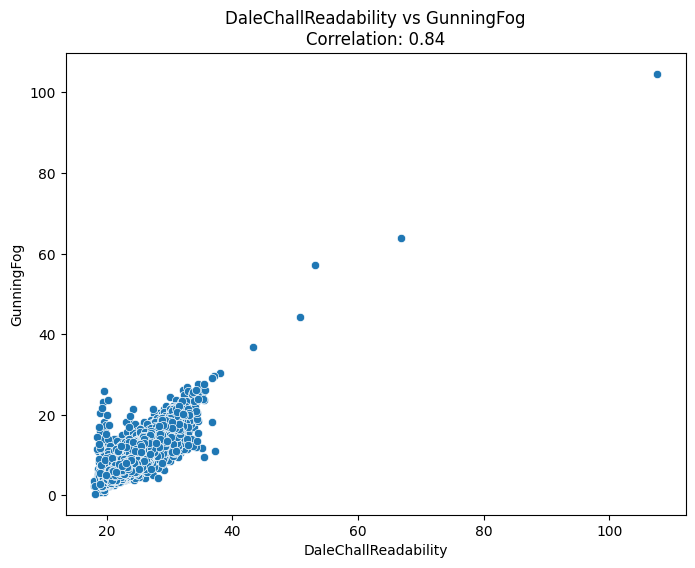

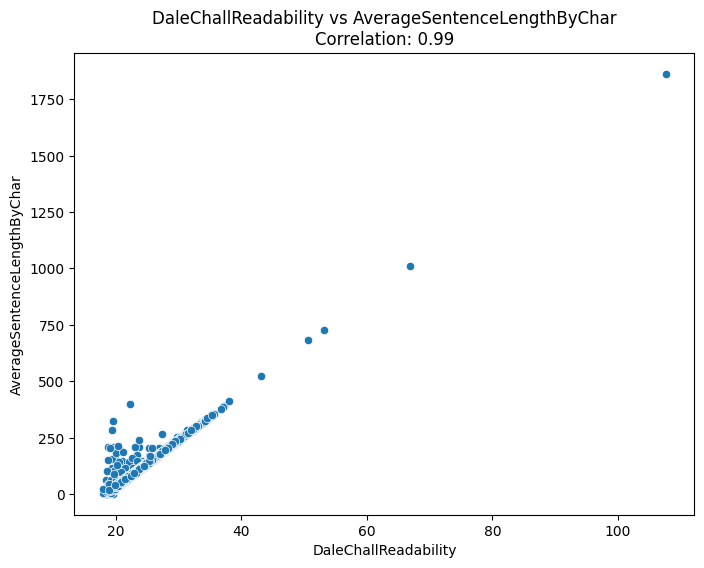

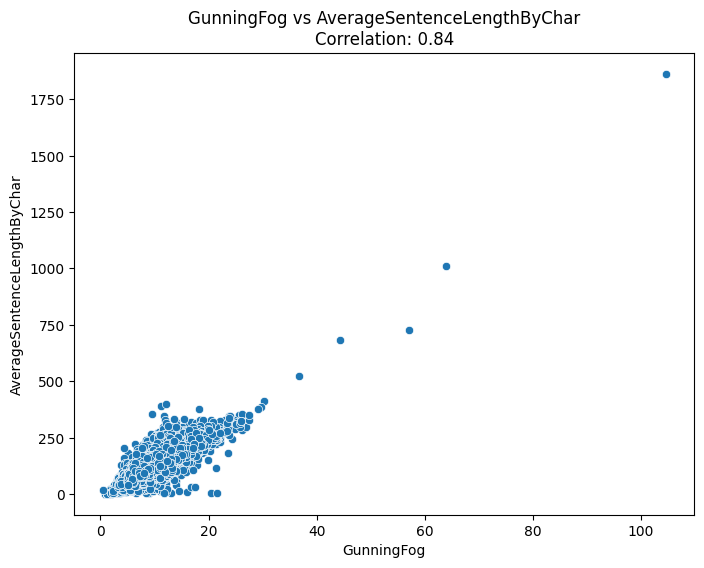

In [52]:
for (feature1, feature2), corr_value in high_corr_pairs.items():
    if abs(corr_value) > threshold:  
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[feature1], y=df[feature2])
        plt.title(f'{feature1} vs {feature2}\nCorrelation: {corr_value:.2f}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.savefig(f'{plots_dir}x_{feature1} vs {feature2}.png', bbox_inches='tight')
        plt.show()

In [53]:
top_correlations = (correlation_matrix.abs()              
                    .unstack()                            
                    .reset_index()                        
                    .rename(columns={0: 'Correlation',    
                                     'level_0': 'Feature 1',  
                                     'level_1': 'Feature 2'}) 
                    .query('`Feature 1` != `Feature 2`') 
                    .sort_values(by='Correlation',        
                                 kind="quicksort", 
                                 ascending=False)           
                    .drop_duplicates(subset='Correlation'))
top_correlations = top_correlations.head(10)

In [54]:
print("Top Correlated Features:")
print(top_correlations)

Top Correlated Features:
                       Feature 1                    Feature 2  Correlation
298                SimpsonsIndex         YulesCharacteristicK     0.999855
64   AverageSentenceLengthByWord  AverageSentenceLengthByChar     0.993611
458  AverageSentenceLengthByChar         DaleChallReadability     0.993581
62   AverageSentenceLengthByWord         DaleChallReadability     0.986883
393      FleschKincaidGradeLevel                   GunningFog     0.983347
390      FleschKincaidGradeLevel            FleschReadingEase     0.940416
371            FleschReadingEase                   GunningFog     0.899913
194               HonoreMeasureR         DaleChallReadability     0.899297
196               HonoreMeasureR  AverageSentenceLengthByChar     0.893956
52   AverageSentenceLengthByWord               HonoreMeasureR     0.891322


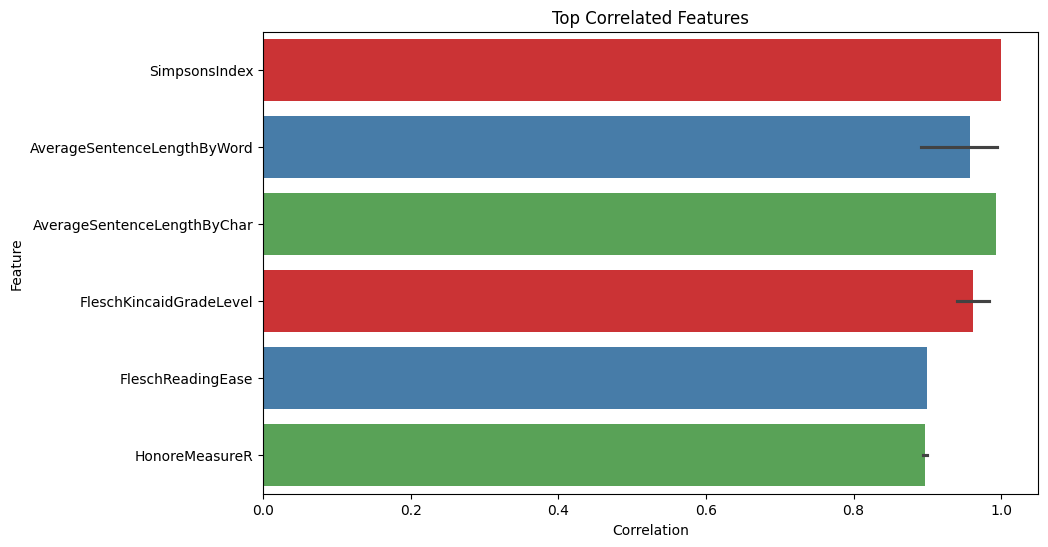

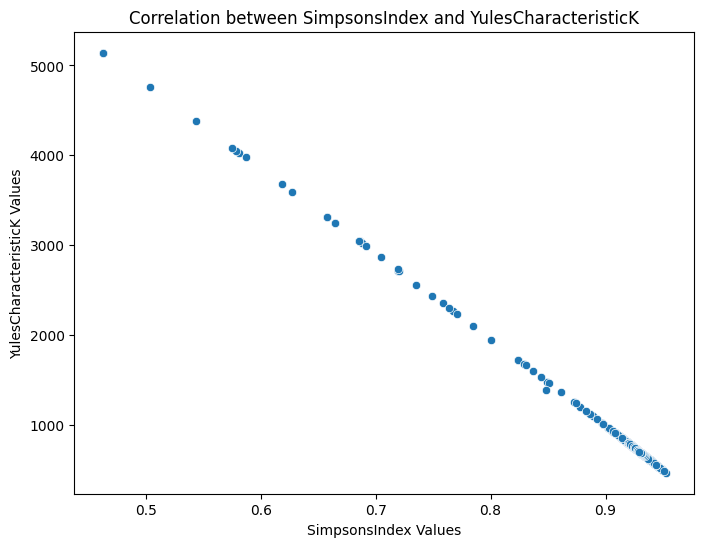

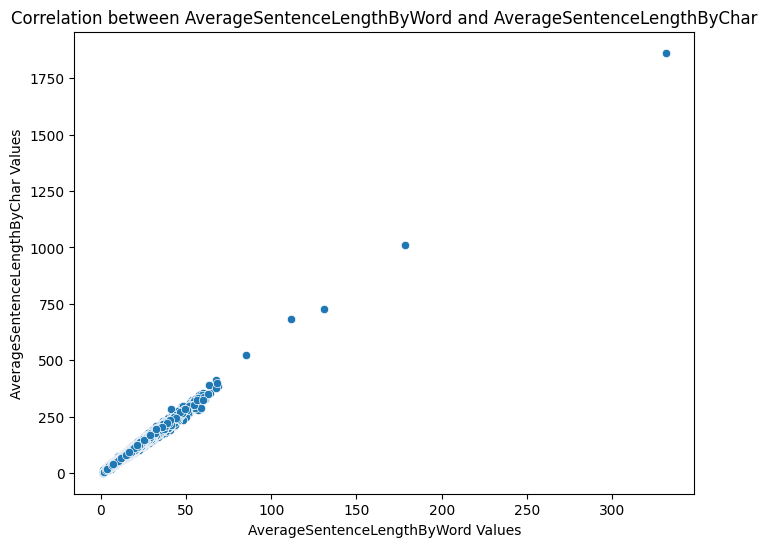

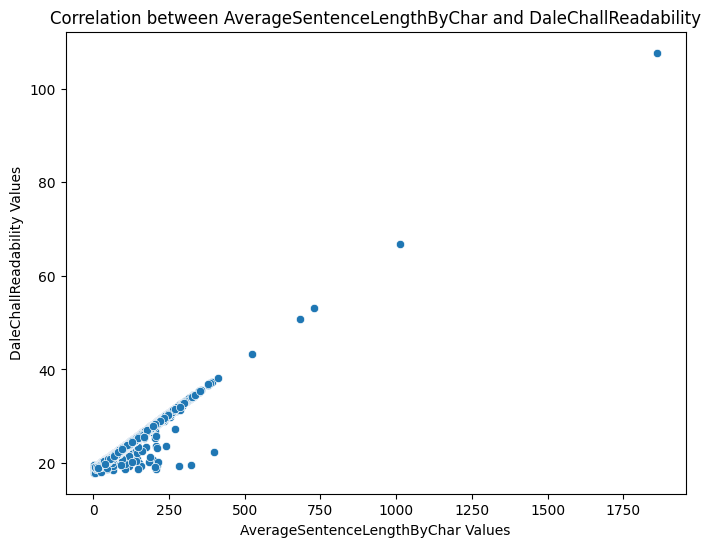

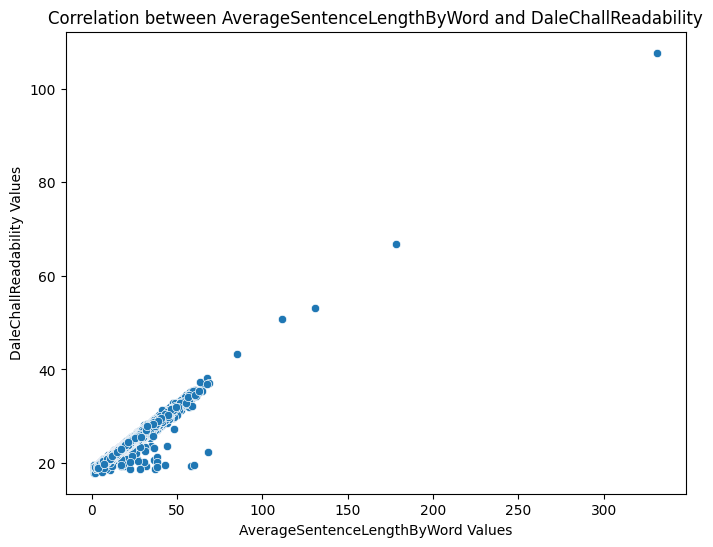

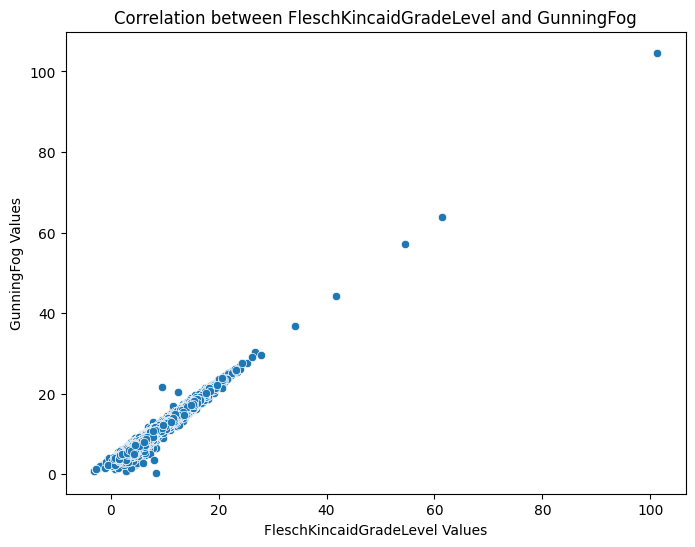

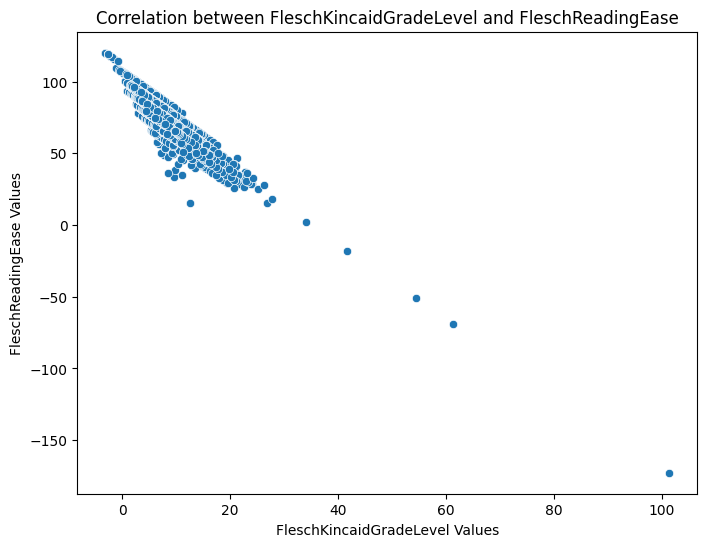

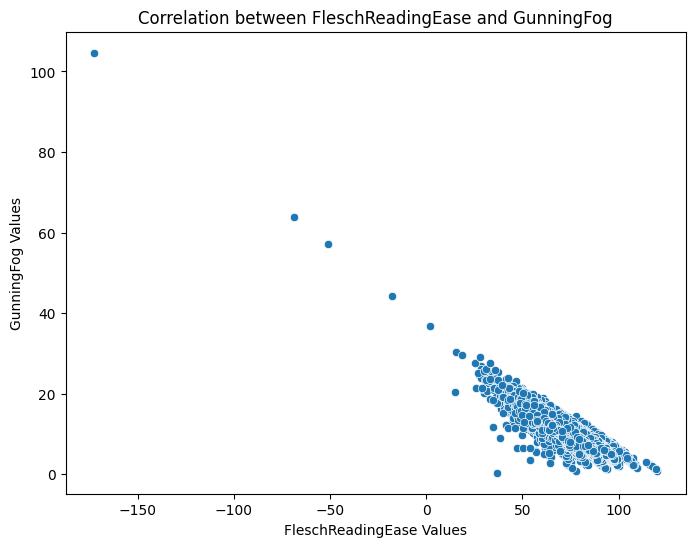

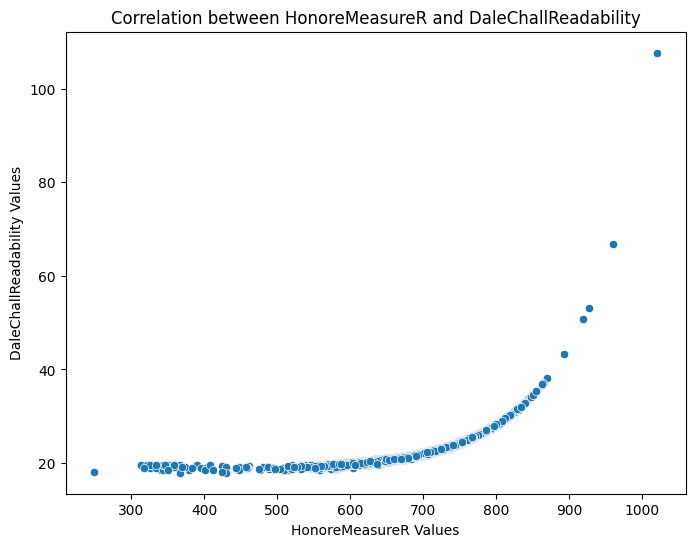

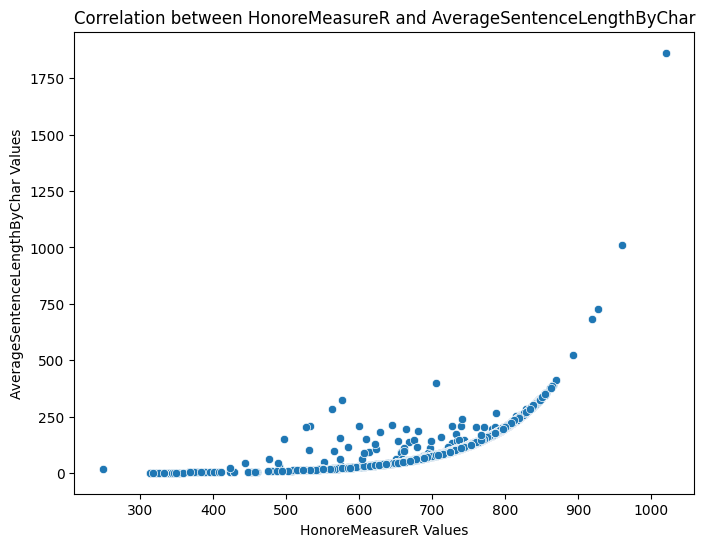

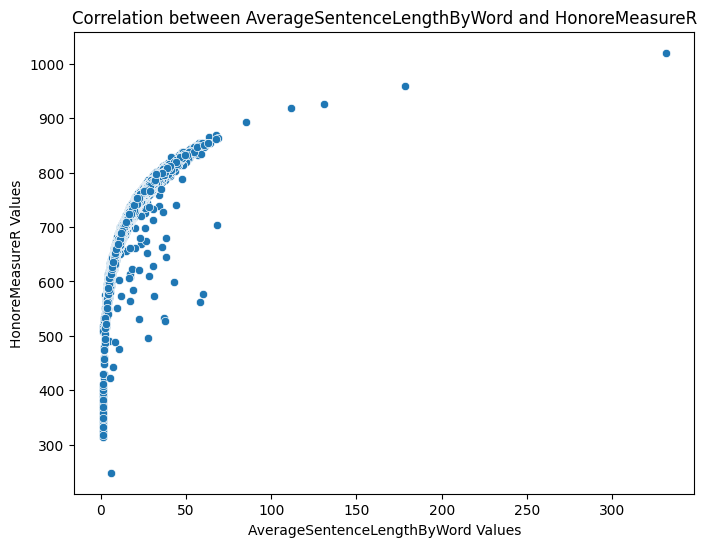

In [55]:
academic_palette = sns.color_palette('Set1', n_colors=df['ClusterK'].nunique())
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature 1', data=top_correlations, palette=academic_palette)
plt.title('Top Correlated Features')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.savefig(f'{plots_dir}tcfeatures.pdf', bbox_inches='tight')
plt.show()
for index, row in top_correlations.iterrows():
    feature1 = row['Feature 1']
    feature2 = row['Feature 2']
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature1, y=feature2, data=df)  
    plt.title(f'Correlation between {feature1} and {feature2}')
    plt.xlabel(f'{feature1} Values')
    plt.ylabel(f'{feature2} Values')
    plt.grid(False)
    plt.savefig(f'{plots_dir}Correlation between {feature1} and {feature2}.svg', bbox_inches='tight')
    plt.show()

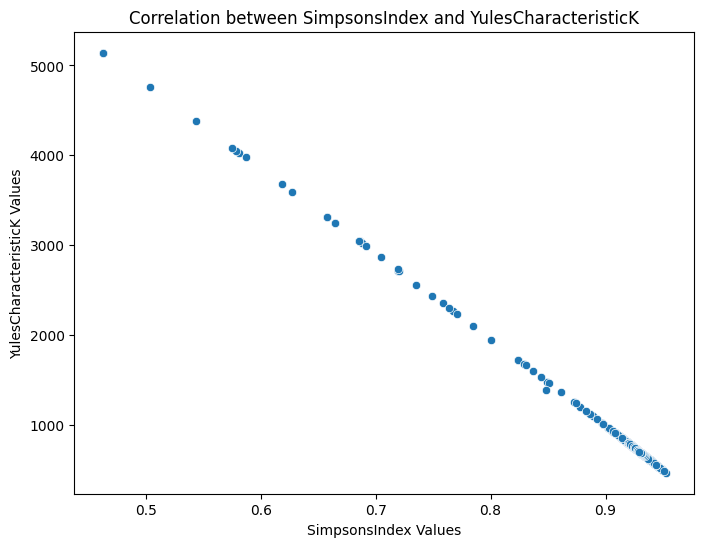

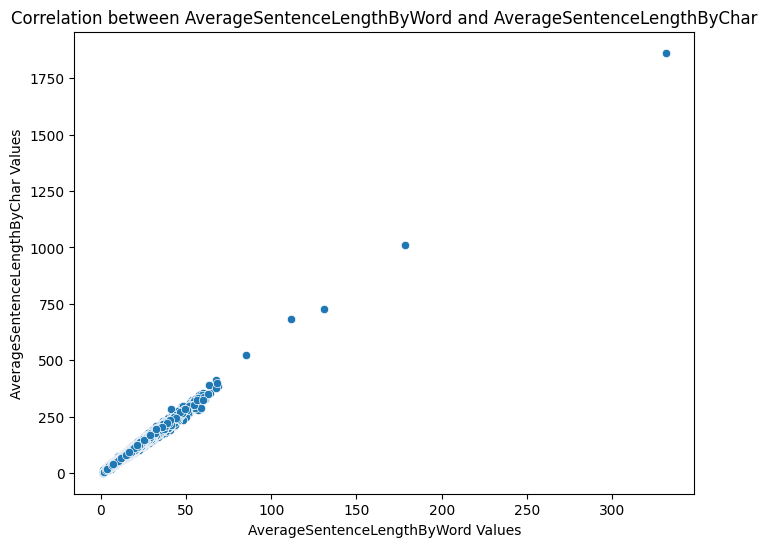

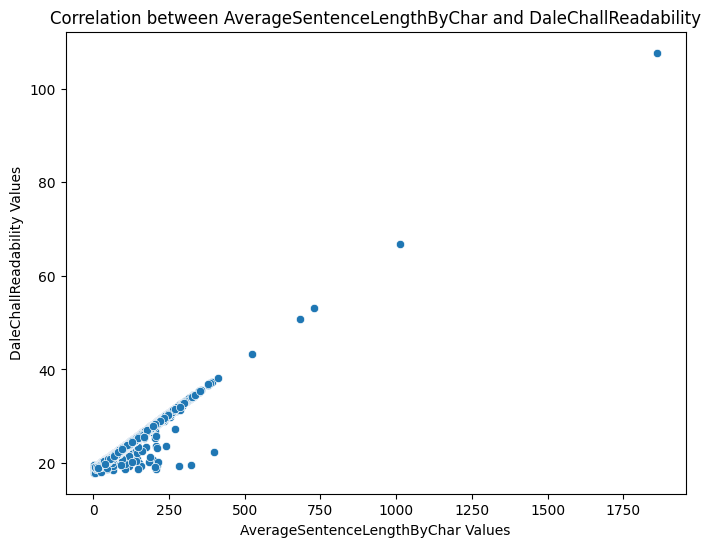

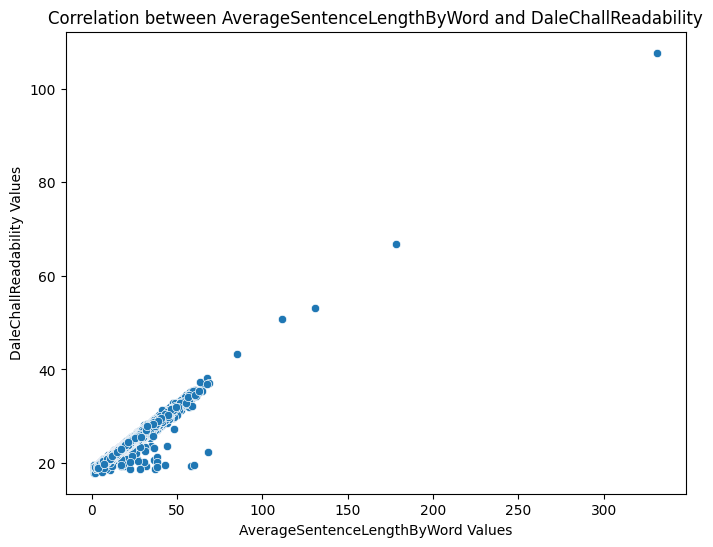

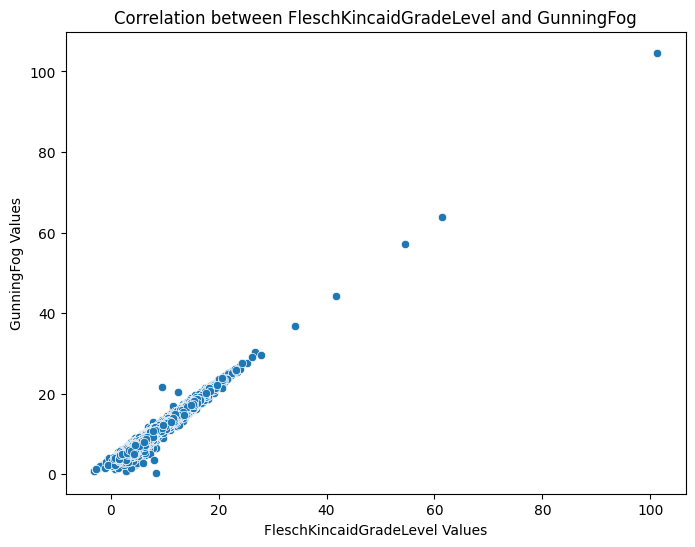

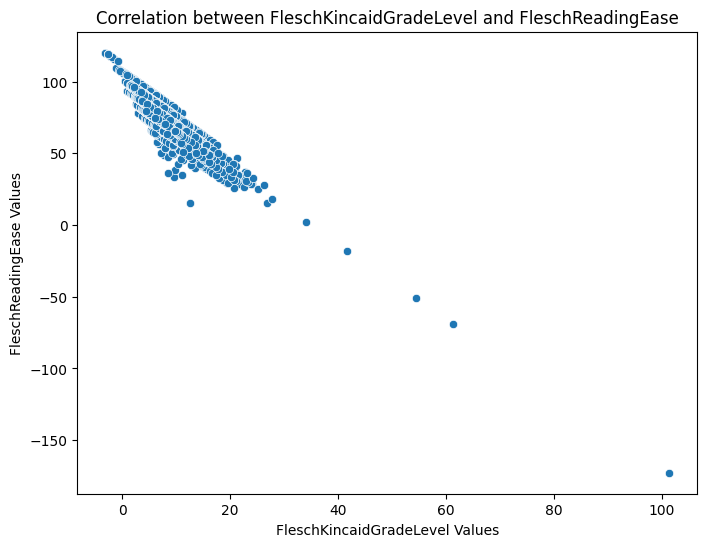

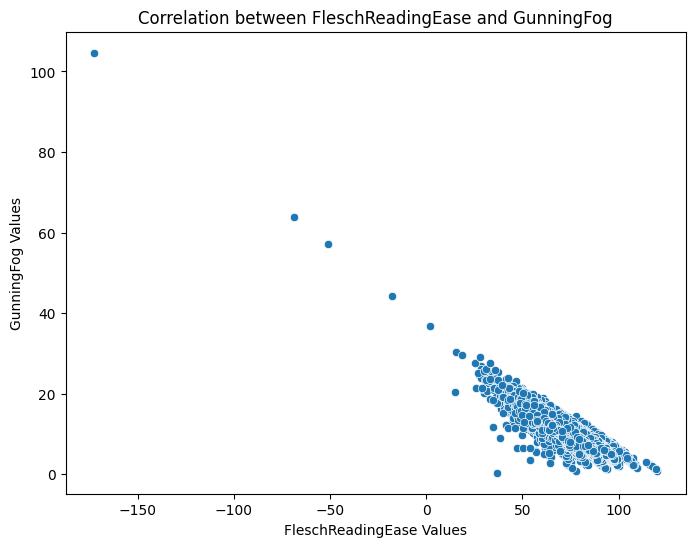

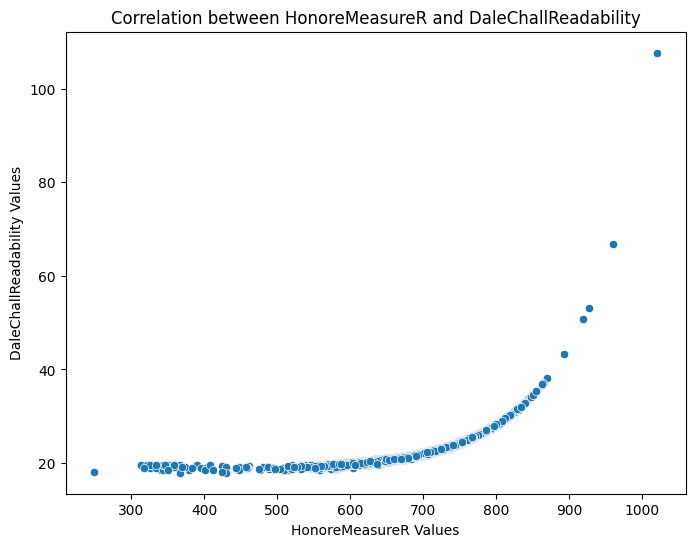

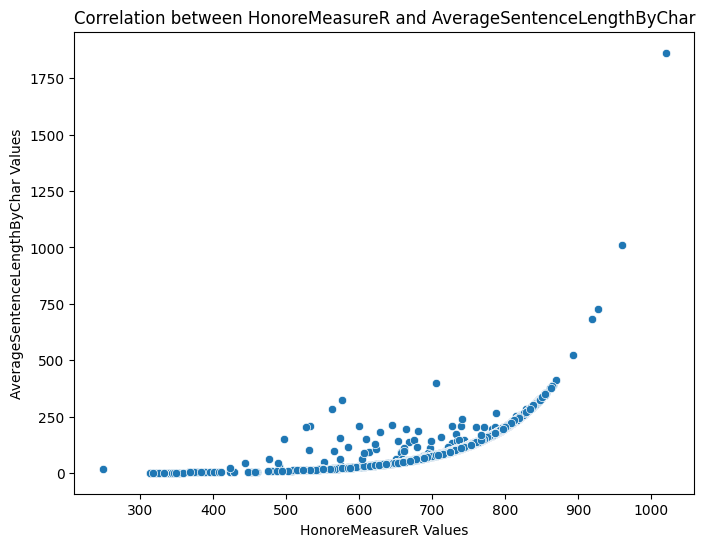

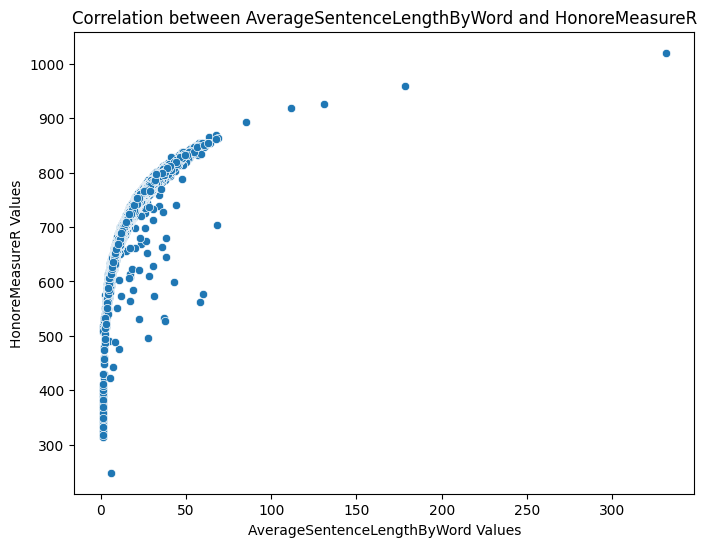

In [56]:
for index, row in top_correlations.iterrows():
    feature1 = row['Feature 1']
    feature2 = row['Feature 2']
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature1, y=feature2, data=df)  
    plt.title(f'Correlation between {feature1} and {feature2}')
    plt.xlabel(f'{feature1} Values')
    plt.ylabel(f'{feature2} Values')
    plt.grid(False)
    plt.show()

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = cluster_model.fit_predict(correlation_matrix)

In [59]:
correlation_matrix['Cluster'] = clusters
correlation_matrix['Cluster'] = correlation_matrix['Cluster'].astype(str)

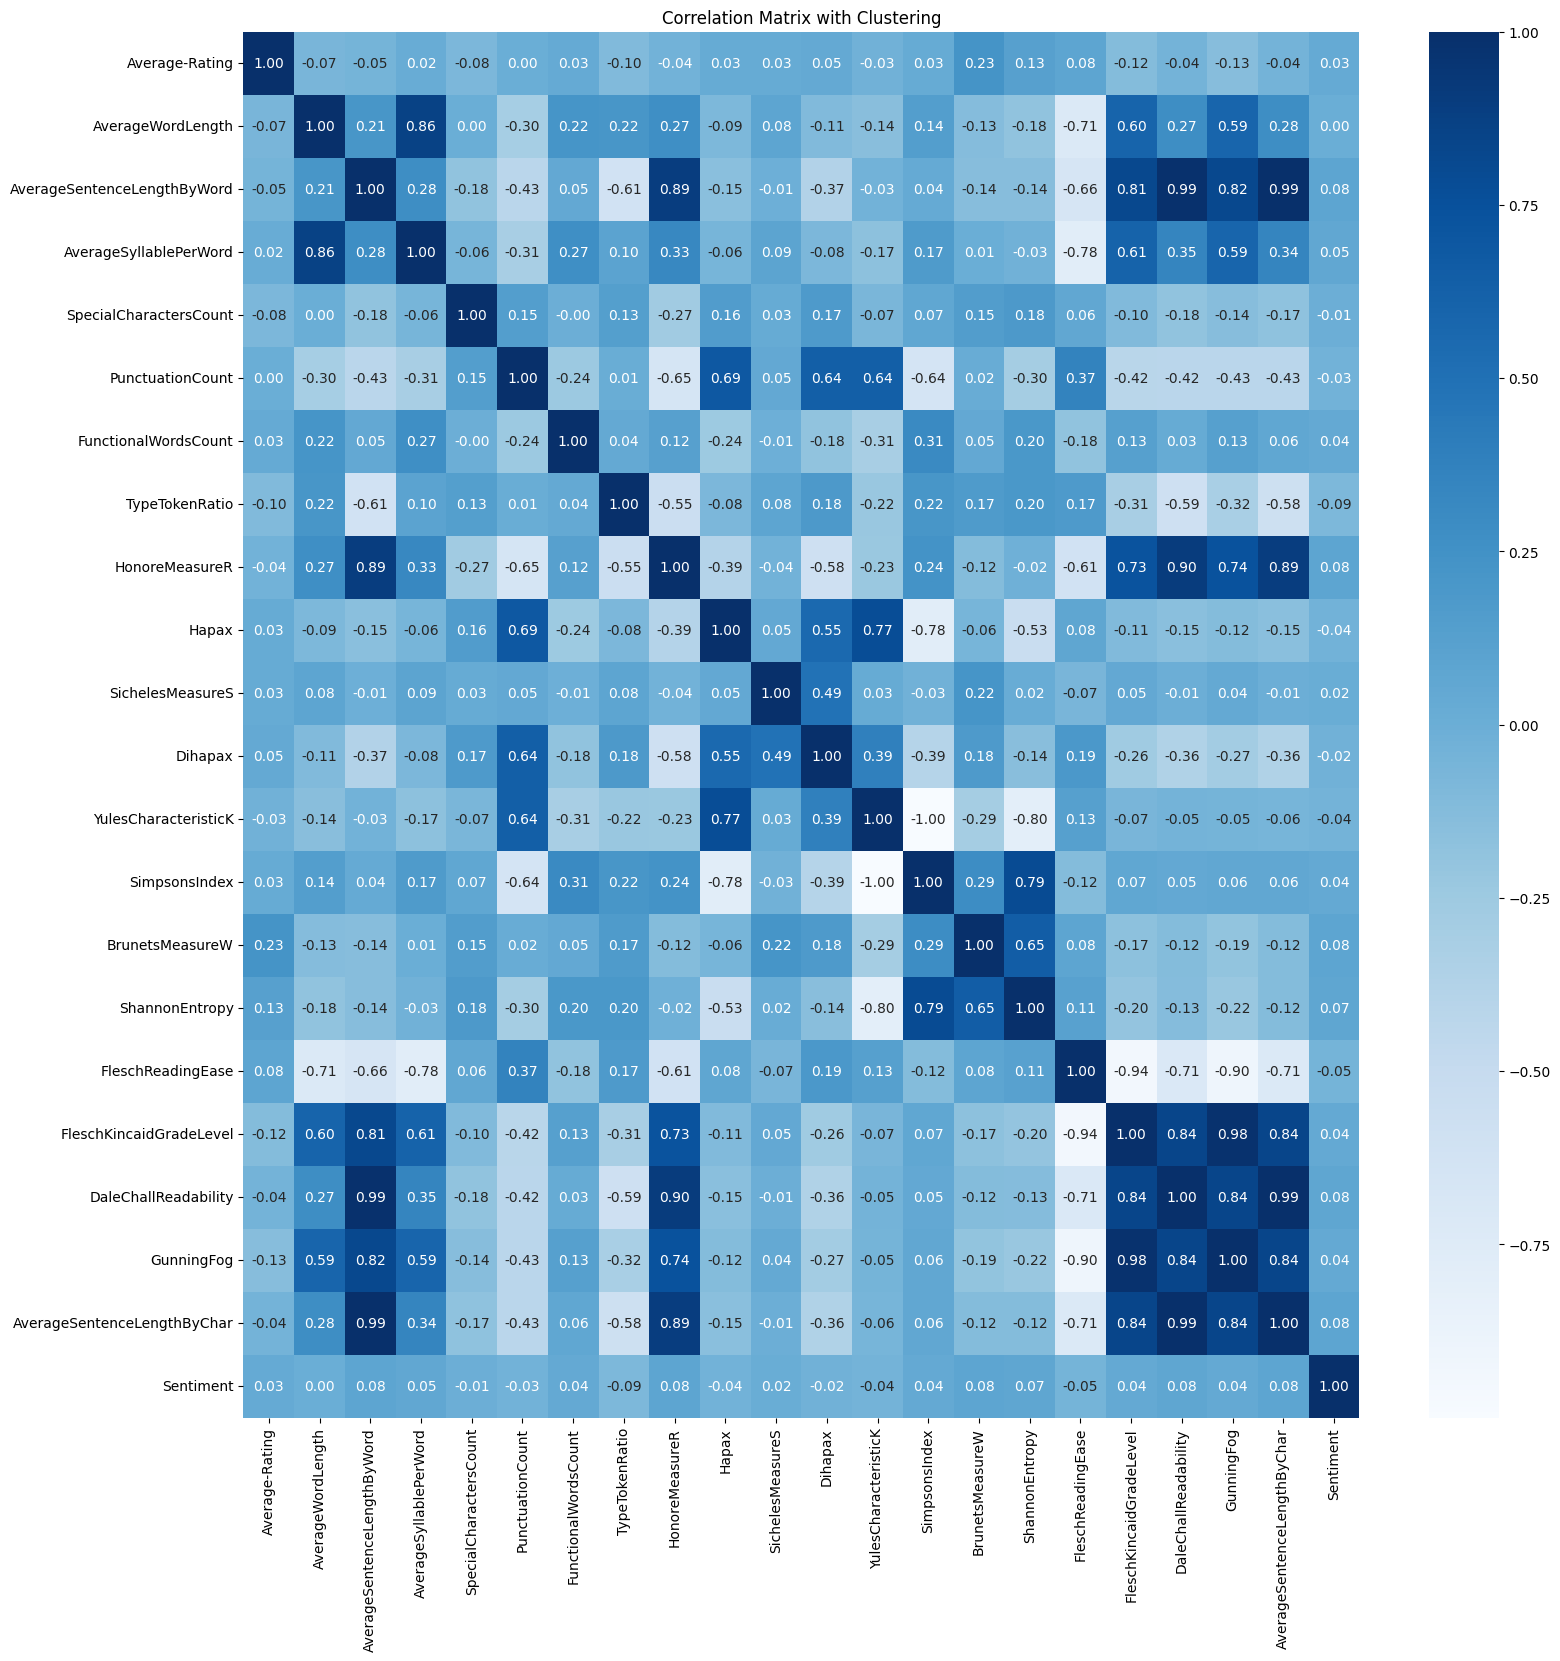

In [60]:
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix.drop('Cluster', axis=1), cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation Matrix with Clustering')
plt.show()

In [61]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(correlation_matrix.drop('Cluster', axis=1))

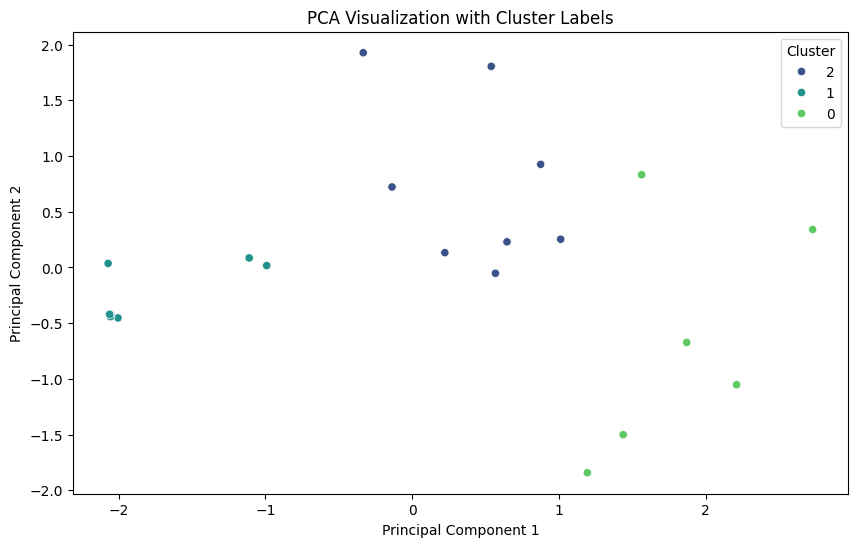

In [62]:
correlation_matrix['PC1'] = pca_result[:, 0]
correlation_matrix['PC2'] = pca_result[:, 1]

# Visualize PCA results with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=correlation_matrix, palette='viridis', legend='full')
plt.title('PCA Visualization with Cluster Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

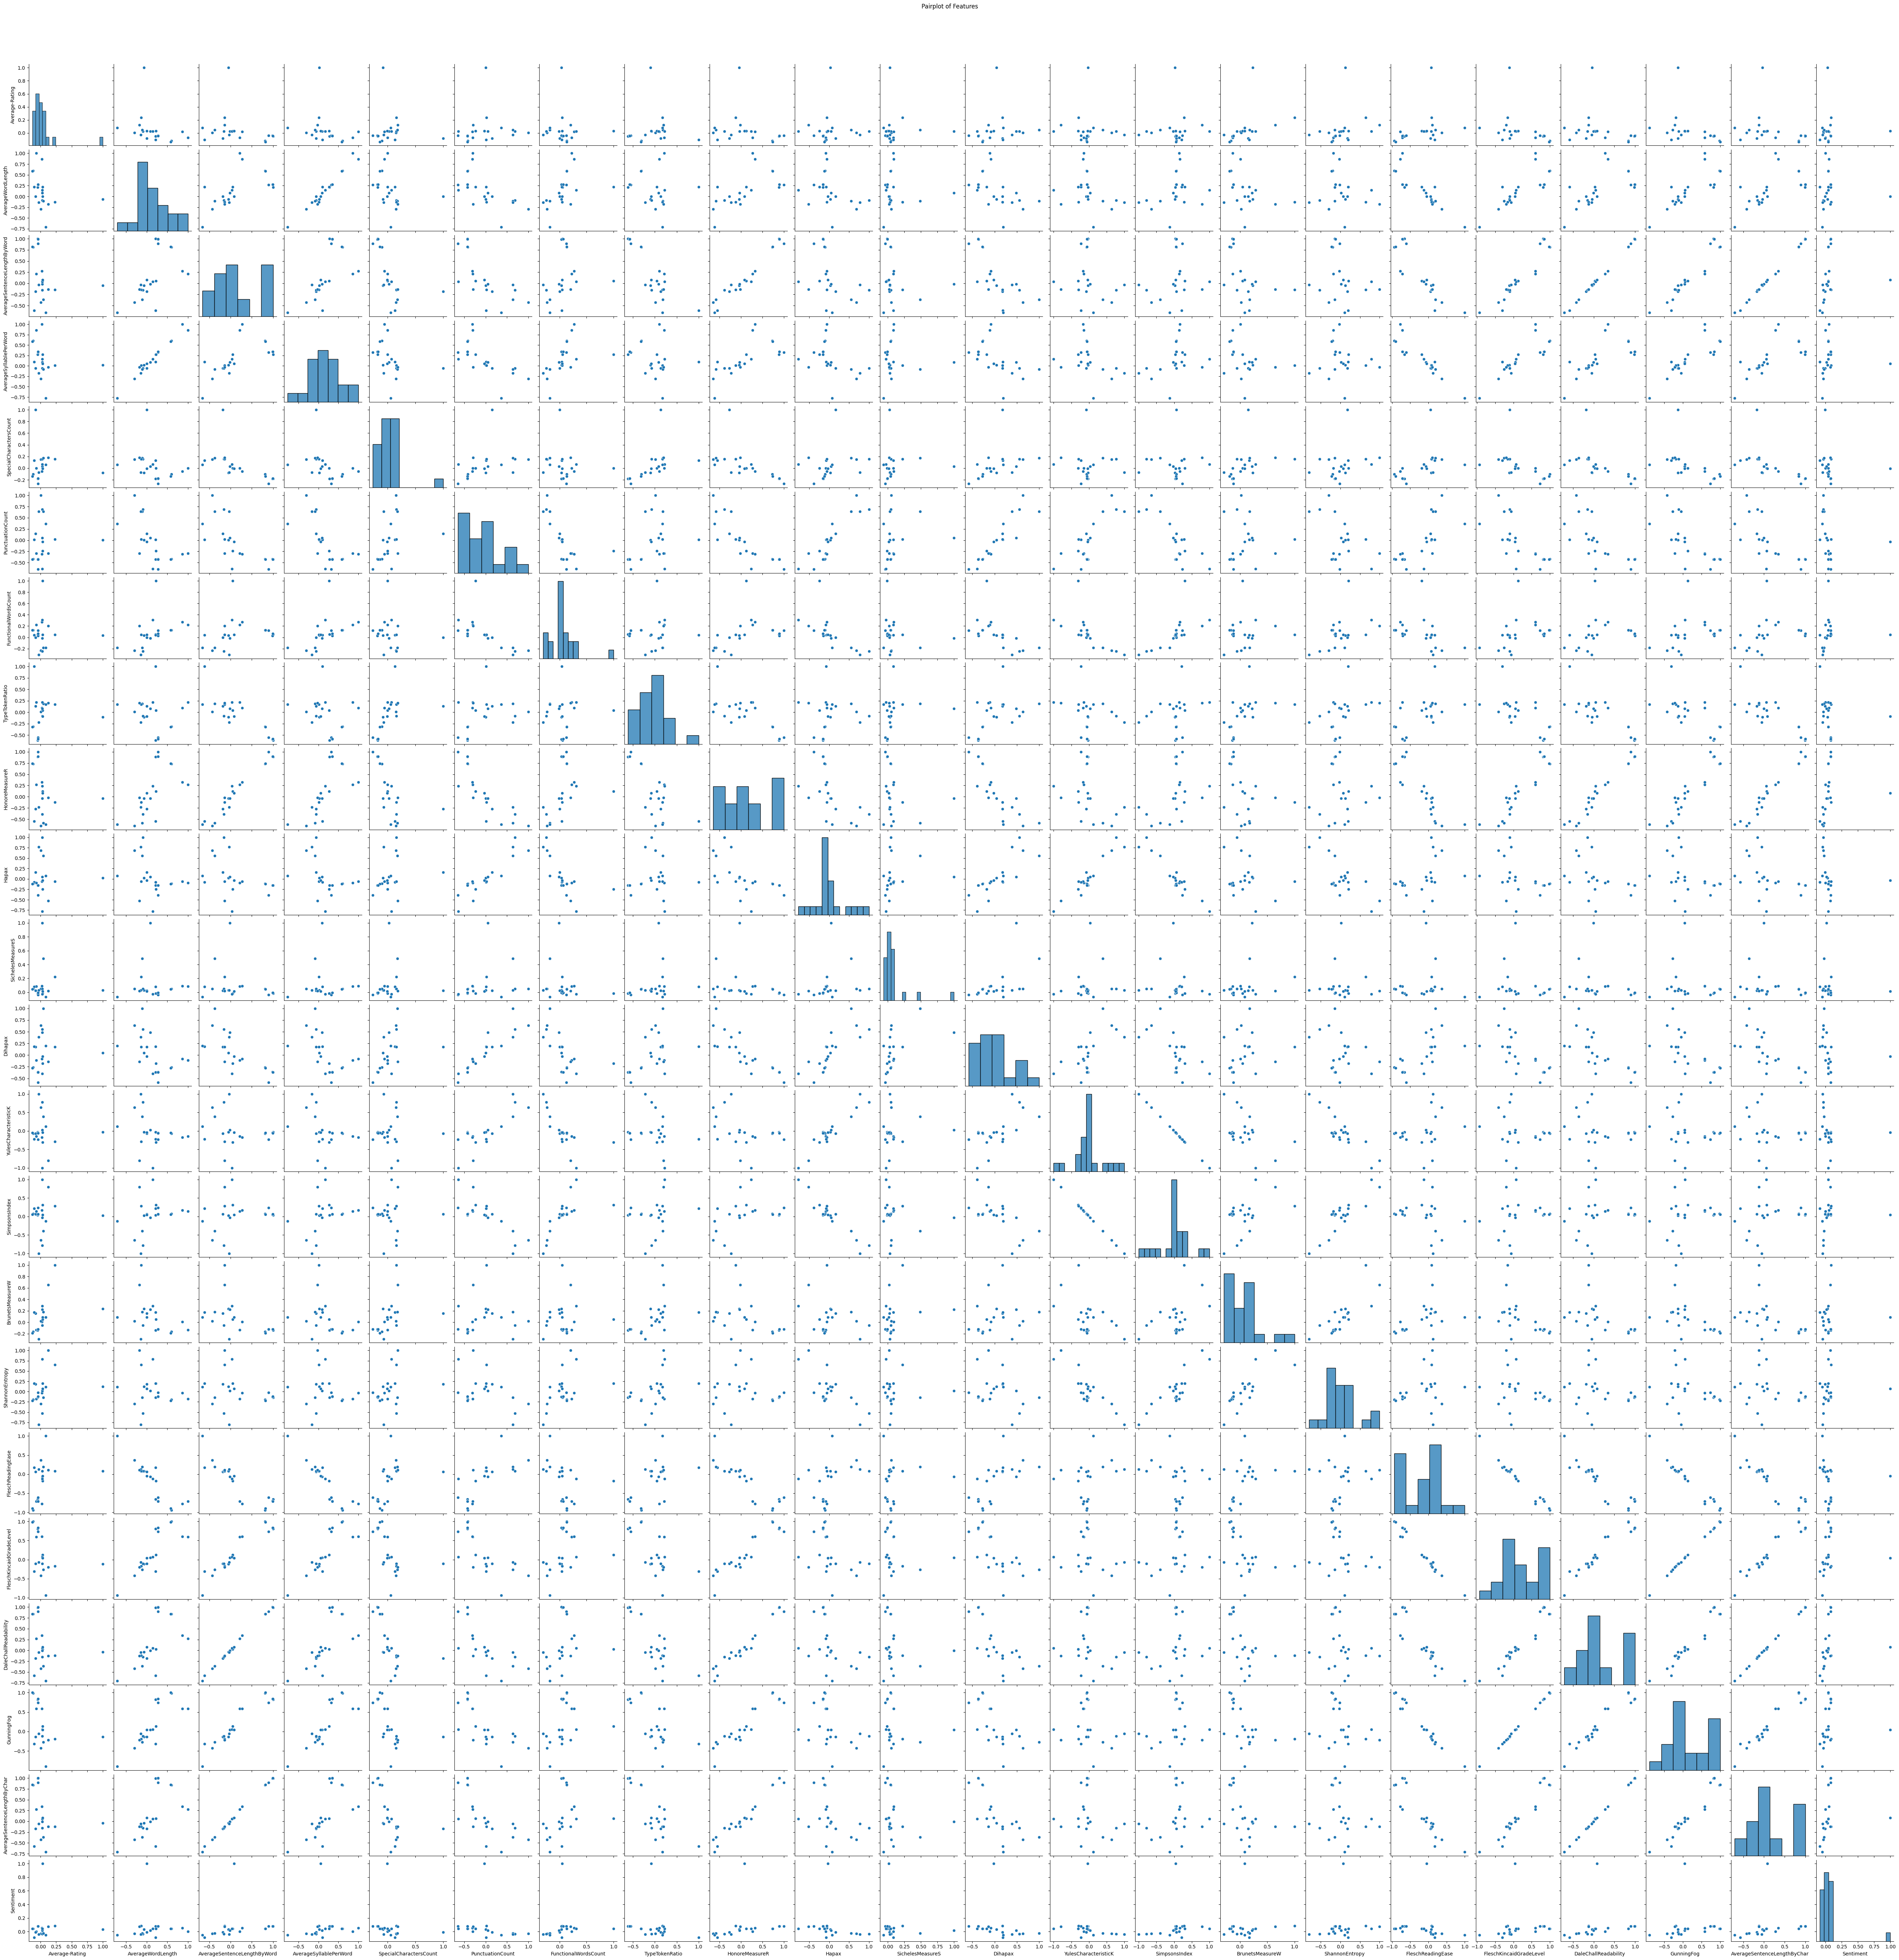

In [63]:
sns.pairplot(correlation_matrix.drop(['Cluster', 'PC1', 'PC2'], axis=1))
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [64]:
target_variable = 'Average-Rating'
feature_importance = correlation_matrix[target_variable].abs().sort_values(ascending=False)
print("\nFeature Importance (Sorted by Absolute Correlation with {}):\n".format(target_variable))
print(feature_importance)


Feature Importance (Sorted by Absolute Correlation with Average-Rating):

Average-Rating                 1.000000
BrunetsMeasureW                0.233620
GunningFog                     0.133576
ShannonEntropy                 0.125048
FleschKincaidGradeLevel        0.118006
TypeTokenRatio                 0.101924
SpecialCharactersCount         0.081785
FleschReadingEase              0.081628
AverageWordLength              0.069359
AverageSentenceLengthByWord    0.047263
Dihapax                        0.045276
AverageSentenceLengthByChar    0.042495
DaleChallReadability           0.040762
HonoreMeasureR                 0.038208
Sentiment                      0.033636
FunctionalWordsCount           0.032379
SichelesMeasureS               0.028107
YulesCharacteristicK           0.026999
Hapax                          0.025532
SimpsonsIndex                  0.025401
AverageSyllablePerWord         0.021909
PunctuationCount               0.002004
Name: Average-Rating, dtype: float64


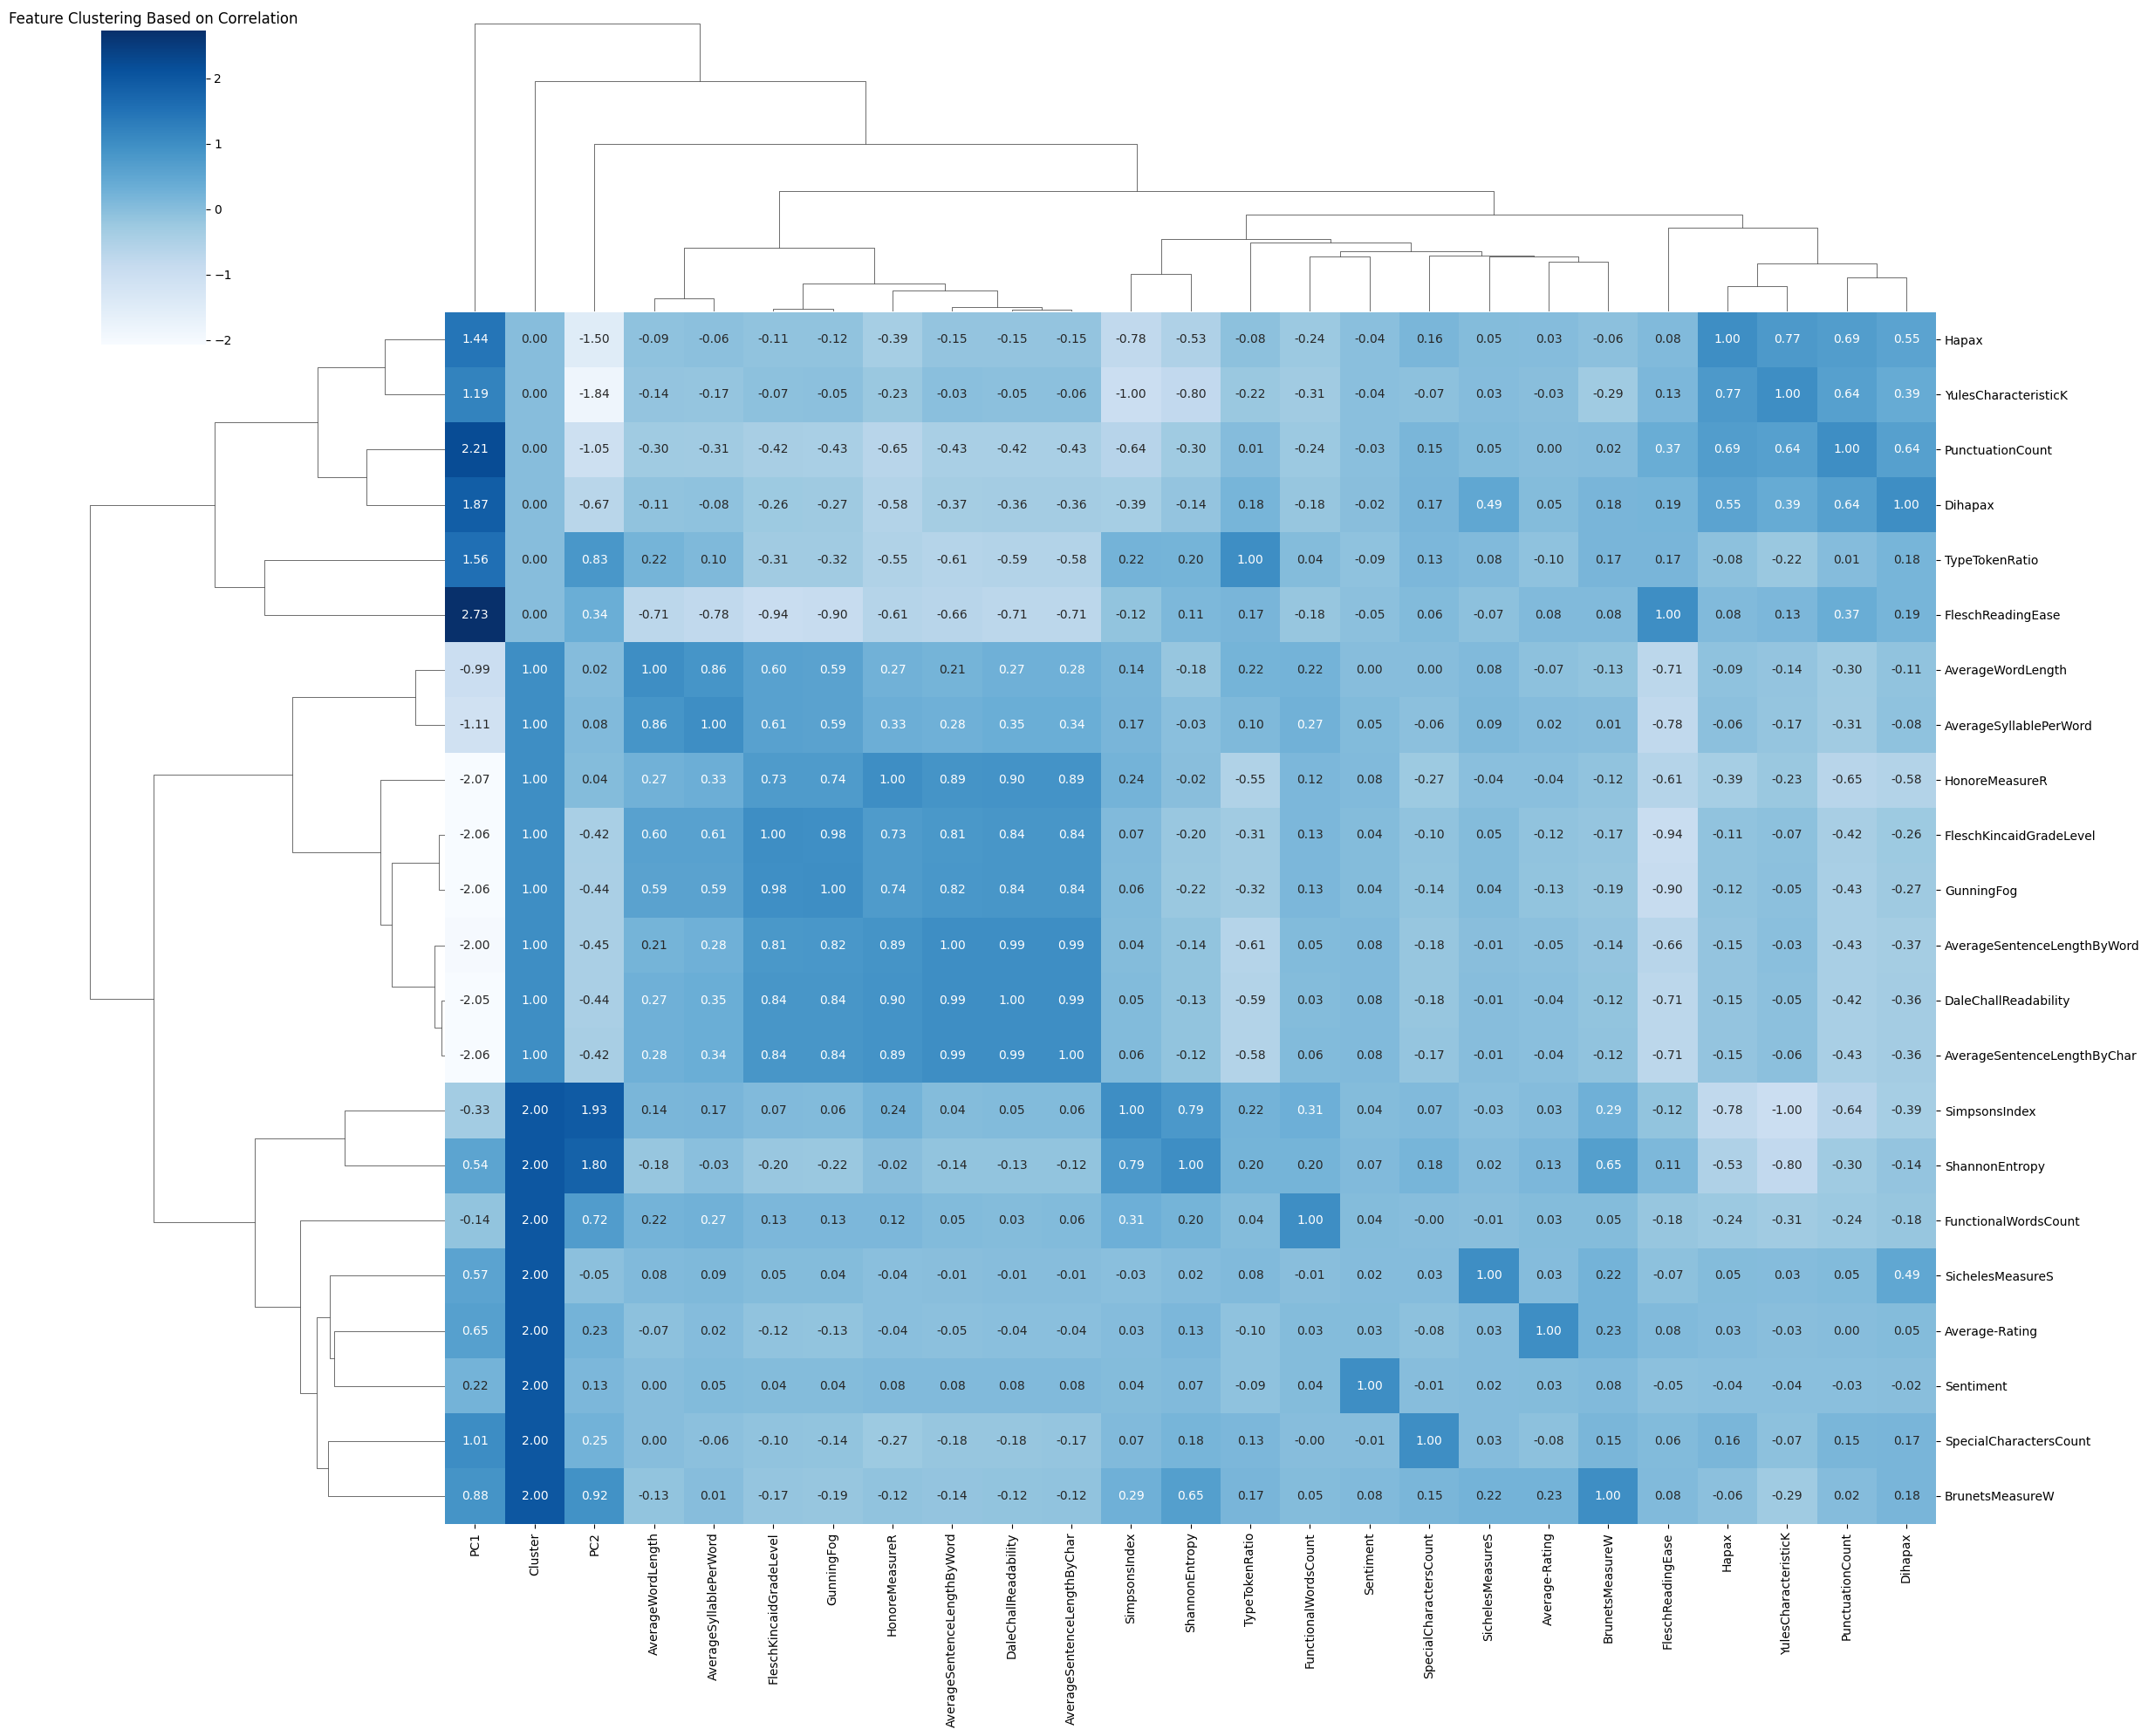

In [65]:
correlation_matrix = correlation_matrix.apply(pd.to_numeric, errors='coerce')
sns.clustermap(correlation_matrix, cmap='Blues', figsize=(24, 20), annot=True, fmt=".2f")
plt.title('Feature Clustering Based on Correlation')
plt.show()

In [66]:
highly_correlated_pairs = np.where((correlation_matrix > 0.7) & (correlation_matrix < 1.0))
highly_correlated_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*highly_correlated_pairs) if x != y]
print("\nHighly Correlated Feature Pairs (> 0.7):\n", highly_correlated_pairs)


Highly Correlated Feature Pairs (> 0.7):
 [('AverageWordLength', 'AverageSyllablePerWord'), ('AverageSentenceLengthByWord', 'HonoreMeasureR'), ('AverageSentenceLengthByWord', 'FleschKincaidGradeLevel'), ('AverageSentenceLengthByWord', 'DaleChallReadability'), ('AverageSentenceLengthByWord', 'GunningFog'), ('AverageSentenceLengthByWord', 'AverageSentenceLengthByChar'), ('AverageSyllablePerWord', 'AverageWordLength'), ('FunctionalWordsCount', 'PC2'), ('TypeTokenRatio', 'PC2'), ('HonoreMeasureR', 'AverageSentenceLengthByWord'), ('HonoreMeasureR', 'FleschKincaidGradeLevel'), ('HonoreMeasureR', 'DaleChallReadability'), ('HonoreMeasureR', 'GunningFog'), ('HonoreMeasureR', 'AverageSentenceLengthByChar'), ('Hapax', 'YulesCharacteristicK'), ('YulesCharacteristicK', 'Hapax'), ('SimpsonsIndex', 'ShannonEntropy'), ('BrunetsMeasureW', 'PC1'), ('BrunetsMeasureW', 'PC2'), ('ShannonEntropy', 'SimpsonsIndex'), ('FleschKincaidGradeLevel', 'AverageSentenceLengthByWord'), ('FleschKincaidGradeLevel', 'Hon

In [67]:
X = correlation_matrix.iloc[:, :-1].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, correlation_matrix.iloc[:, -1]], axis=1)

In [68]:
for feature_pair in highly_correlated_pairs:
    interaction_term = correlation_matrix[feature_pair[0]] * correlation_matrix[feature_pair[1]]
    print("\nInteraction Term for {} and {}:".format(feature_pair[0], feature_pair[1]))
    print(interaction_term)

# 6. Feature Selection
# Example: Use Lasso regularization for feature selection
from sklearn.linear_model import LassoCV
X_features = correlation_matrix.drop(columns=[target_variable])
y_target = correlation_matrix[target_variable]
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_features, y_target)
selected_features = X_features.columns[lasso_model.coef_ != 0]
print("\nSelected Features using Lasso Regularization:")
print(selected_features)


Interaction Term for AverageWordLength and AverageSyllablePerWord:
Average-Rating                -0.001520
AverageWordLength              0.860712
AverageSentenceLengthByWord    0.058600
AverageSyllablePerWord         0.860712
SpecialCharactersCount        -0.000017
PunctuationCount               0.092720
FunctionalWordsCount           0.060093
TypeTokenRatio                 0.021000
HonoreMeasureR                 0.088129
Hapax                          0.005264
SichelesMeasureS               0.007363
Dihapax                        0.009103
YulesCharacteristicK           0.024423
SimpsonsIndex                  0.023984
BrunetsMeasureW               -0.000998
ShannonEntropy                 0.005049
FleschReadingEase              0.555539
FleschKincaidGradeLevel        0.361871
DaleChallReadability           0.094739
GunningFog                     0.345331
AverageSentenceLengthByChar    0.094644
Sentiment                      0.000007
dtype: float64

Interaction Term for AverageSentence

In [69]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(correlation_matrix)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
explained_variance_ratio = pca.explained_variance_ratio_

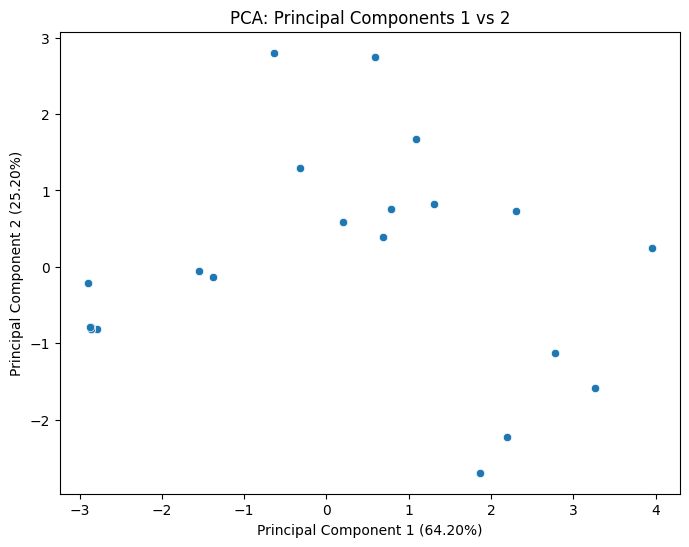

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df)
plt.title('PCA: Principal Components 1 vs 2')
plt.xlabel('Principal Component 1 ({:.2f}%)'.format(explained_variance_ratio[0]*100))
plt.ylabel('Principal Component 2 ({:.2f}%)'.format(explained_variance_ratio[1]*100))
plt.show()

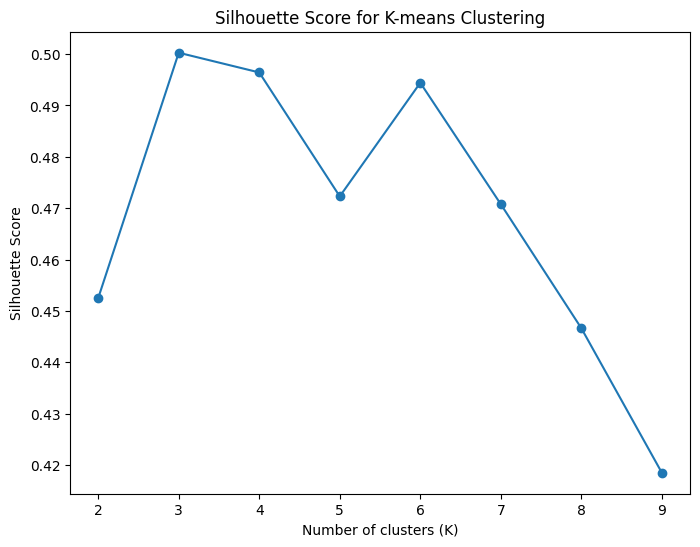

In [71]:
from sklearn.metrics import silhouette_score
k_range = range(2, 10)  # Test different numbers of clusters
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(correlation_matrix)
    silhouette_avg = silhouette_score(correlation_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualize silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for K-means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(False)
plt.show()

In [72]:
embeddings = pd.DataFrame(df['Embeddings'].tolist())

In [73]:
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

In [74]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(embeddings_pca)

In [75]:
df['Cluster'] = clusters

In [76]:
correlation_features = ['Average-Rating', 'FleschReadingEase', 'GunningFog', 'Cluster']
correlations = df[correlation_features].corr()

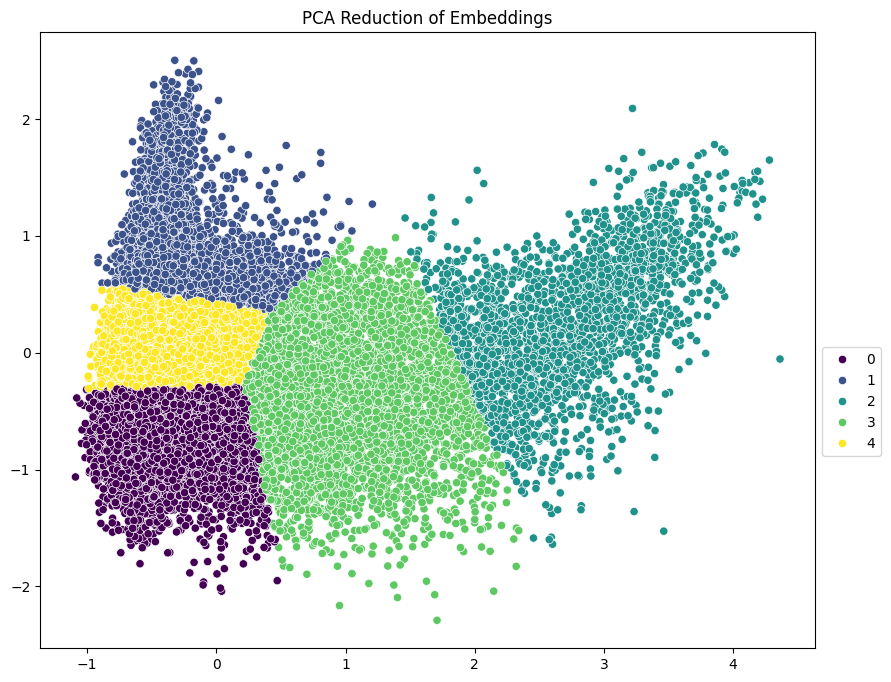

In [77]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_pca[:, 0], y=embeddings_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('PCA Reduction of Embeddings')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

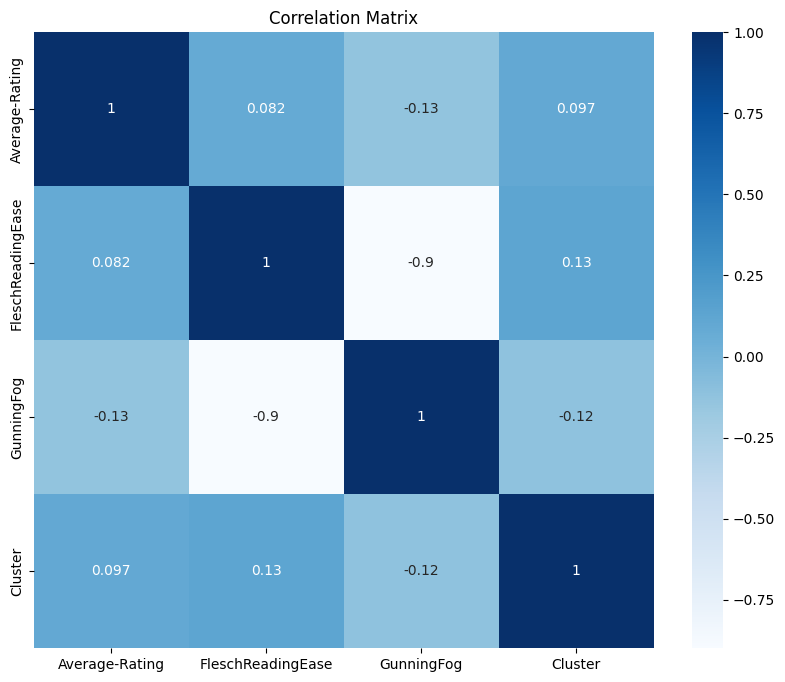

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [79]:
correlations

Average-Rating  FleschReadingEase  GunningFog   Cluster
Average-Rating           1.000000           0.081628   -0.133576  0.097021
FleschReadingEase        0.081628           1.000000   -0.899913  0.126377
GunningFog              -0.133576          -0.899913    1.000000 -0.120492
Cluster                  0.097021           0.126377   -0.120492  1.000000

In [80]:
numeric_cols = ['Average-Rating', 'AverageWordLength', 'AverageSentenceLengthByWord',
                'AverageSyllablePerWord', 'SpecialCharactersCount', 'PunctuationCount',
                'FunctionalWordsCount', 'TypeTokenRatio', 'HonoreMeasureR', 'Hapax',
                'SichelesMeasureS', 'Dihapax', 'YulesCharacteristicK', 'SimpsonsIndex',
                'BrunetsMeasureW', 'ShannonEntropy', 'FleschReadingEase',
                'FleschKincaidGradeLevel', 'DaleChallReadability', 'GunningFog',
                'AverageSentenceLengthByChar', 'Sentiment']

In [81]:
corr_matrix = df[numeric_cols].corr()

In [82]:
academic_palette = sns.color_palette('Set1', n_colors=df['ClusterK'].nunique())

In [83]:
threshold = 0.75
highly_correlated_features = set()
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if abs(corr_matrix.at[col, idx]) > threshold and col != idx:
            highly_correlated_features.update([col, idx])

In [84]:
book_scores = df.groupby('Book')[list(highly_correlated_features)].mean().mean(axis=1)

In [85]:
book_scores_sorted = book_scores.sort_values(ascending=True)

In [86]:
book_scores_sorted

Book
Lady Windermeres Fan                          110.665498
The Importance Of Being Earnest               111.993421
The History Of A Crime                        128.534650
A Room With A View                            128.598563
The Picture Of Dorian Gray                    129.263224
Howards End                                   129.568928
Ninety- Three                                 129.665196
Sentimental Education                         130.440307
Ozma Of Oz                                    130.728279
Lord Jim                                      130.960158
A Passage To India                            131.181876
Nostromo                                      131.335406
White Fang                                    131.463674
Heart Of Darkness                             131.669515
The Sea Wolf                                  132.323236
The Adventures Of Tom Sawyer                  132.613901
The Lair Of The White Worm                    133.324711
Bartleby                  

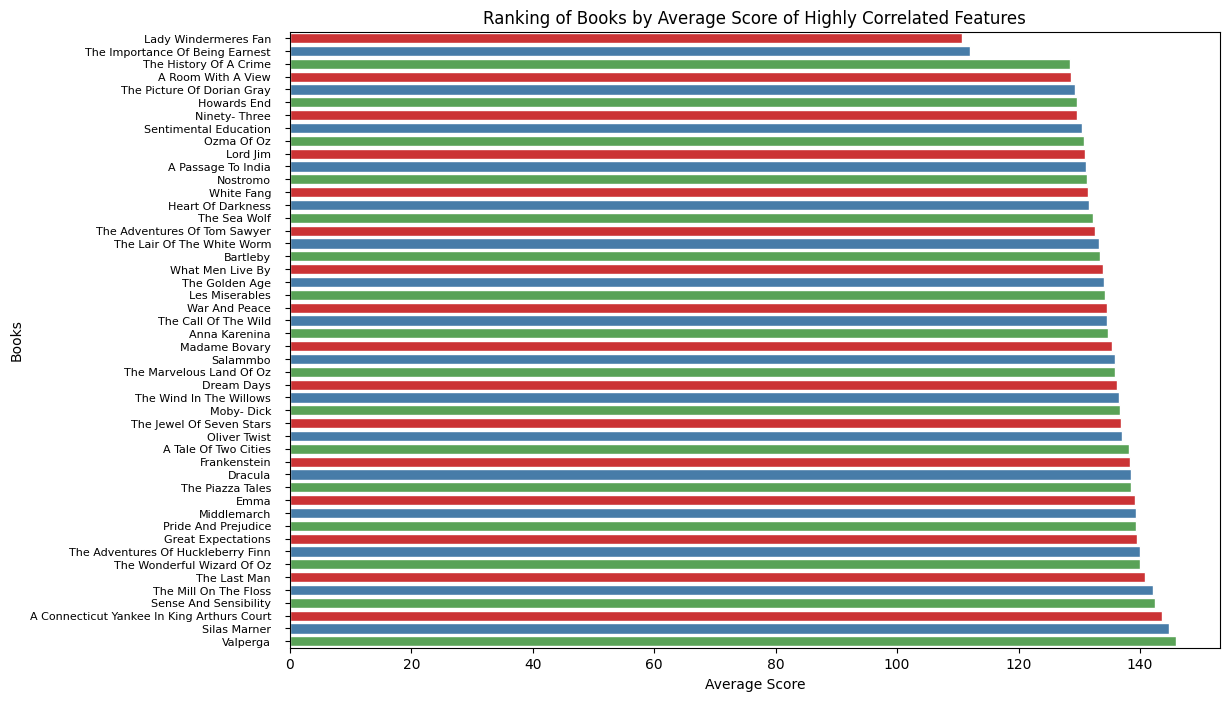

In [87]:
plt.figure(figsize=(12, 8))
sns.barplot(x=book_scores_sorted.values, y=book_scores_sorted.index, palette=academic_palette, edgecolor='white')
plt.title('Ranking of Books by Average Score of Highly Correlated Features')
plt.xlabel('Average Score')
plt.ylabel('Books')
plt.gca().yaxis.set_tick_params(pad=10)
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=8)

plt.savefig(f'{plots_dir}books_ranking.pdf', bbox_inches='tight')
plt.show()

In [88]:
author_scores = df.groupby('Author')[list(highly_correlated_features)].mean().mean(axis=1)

In [89]:
author_scores_sorted = author_scores.sort_values(ascending=False)

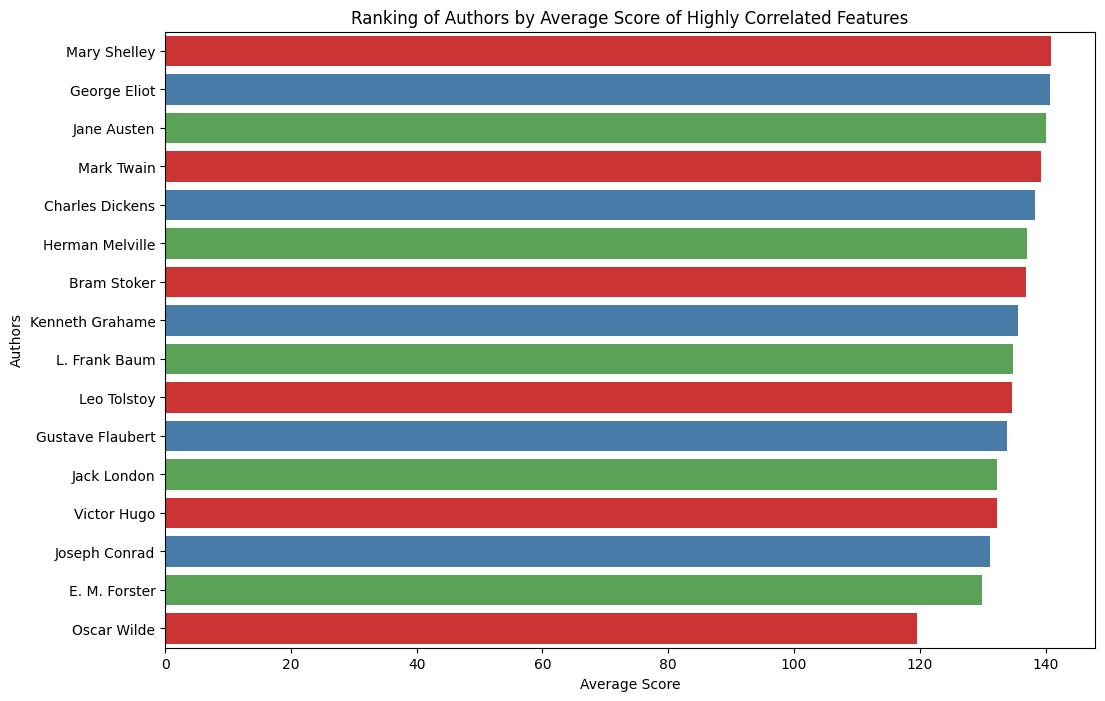

In [90]:
plt.figure(figsize=(12, 8))
sns.barplot(x=author_scores_sorted.values, y=author_scores_sorted.index, palette=academic_palette)
plt.title('Ranking of Authors by Average Score of Highly Correlated Features')
plt.xlabel('Average Score')
plt.ylabel('Authors')
plt.savefig(f'{plots_dir}aurhot_ranking.pdf', bbox_inches='tight')
plt.show()

In [91]:
numerical = ['AverageSentenceLengthByWord', 'SimpsonsIndex', 'AverageSentenceLengthByChar', 'FleschKincaidGradeLevel' ,'FleschReadingEase', 'HonoreMeasureR', 'DaleChallReadability', 'GunningFog', 'YulesCharacteristicK']

In [92]:
df_numerical = df[numerical].copy()

In [93]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [94]:
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

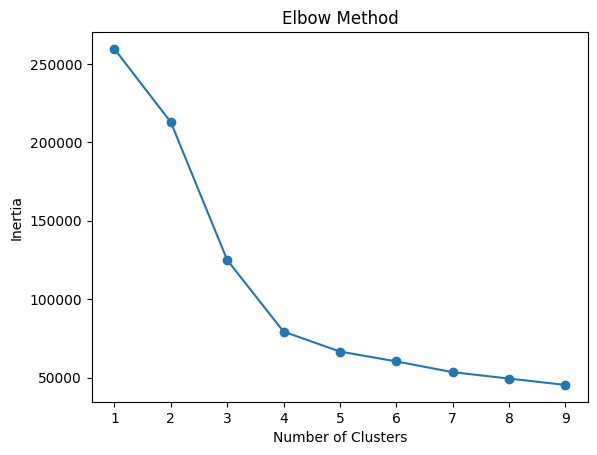

In [95]:
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.savefig(f'{plots_dir}em2.svg', bbox_inches='tight')
plt.show()

In [96]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

In [97]:
df_numerical['ClusterKV'] = clusters  
cluster_props = df_numerical.groupby('ClusterKV').mean()

In [98]:
df['ClusterKV'] = clusters
df_numerical['Cluster'] = df['ClusterKV']

In [99]:
academic_palette = sns.color_palette('Set1', n_colors=df['ClusterKV'].nunique())

In [100]:
cluster_props

AverageSentenceLengthByWord  SimpsonsIndex  \
ClusterKV                                               
0                            22.027552       0.924674   
1                            13.090698       0.924243   
2                            33.229571       0.925068   

           AverageSentenceLengthByChar  FleschKincaidGradeLevel  \
ClusterKV                                                         
0                           121.523112                 7.495264   
1                            70.880764                 4.380407   
2                           188.098189                12.146912   

           FleschReadingEase  HonoreMeasureR  DaleChallReadability  \
ClusterKV                                                            
0                  75.098799      747.068727             24.281950   
1                  85.333966      687.704060             21.823807   
2                  60.062635      790.090513             27.508274   

           GunningFog  YulesCharacteristicK  
ClusterKV                                    
0            9.732520            752.822434  
1            6.555938            756.375959  
2           14.466131            749.040524

In [101]:
cluster_props
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

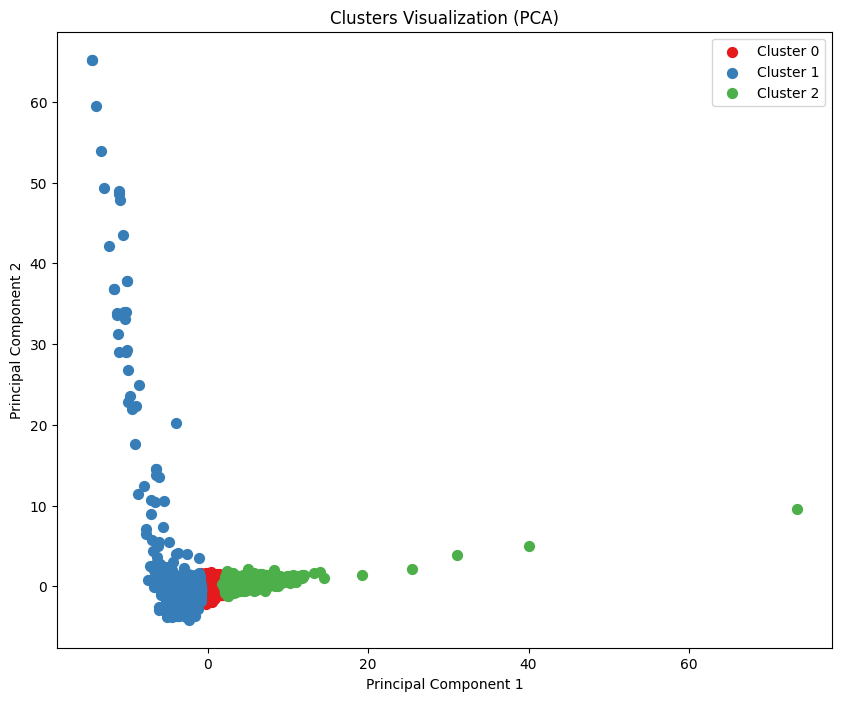

In [102]:
plt.figure(figsize=(10, 8))
for cluster in range(k):
    plt.scatter(df_pca[clusters == cluster, 0], df_pca[clusters == cluster, 1], 
                label=f'Cluster {cluster}', s=50, marker='o',
                color=academic_palette[cluster])  

plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.savefig(f'{plots_dir}cv2.pdf', bbox_inches='tight')
plt.show()

In [103]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_scaled)

In [104]:
df_numerical['t-SNE-1'] = tsne_results[:, 0]
df_numerical['t-SNE-2'] = tsne_results[:, 1]

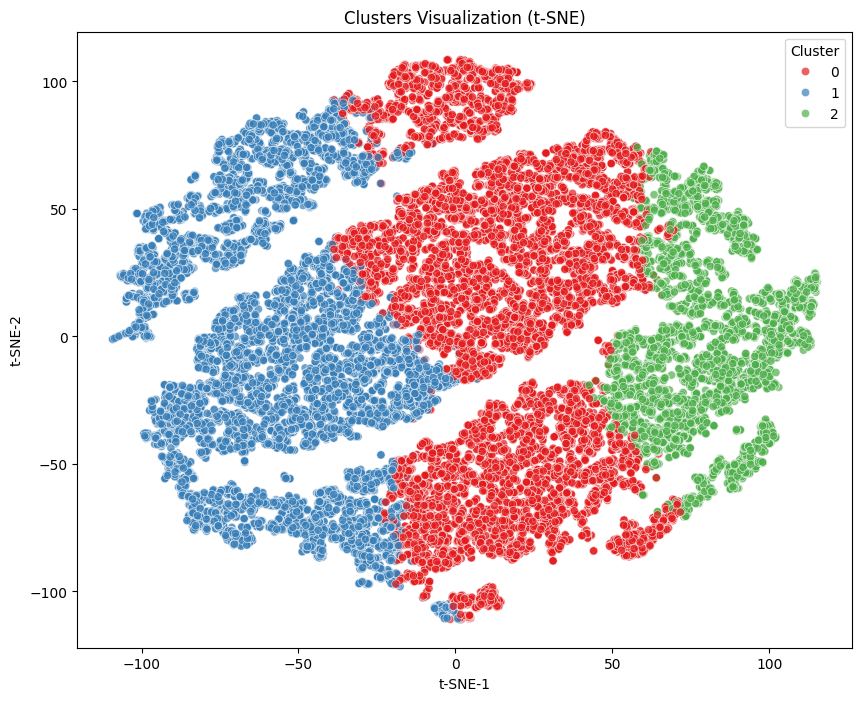

In [105]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="t-SNE-1", y="t-SNE-2",
    hue="Cluster",
    palette=sns.color_palette(academic_palette, k),  
    data=df_numerical,
    legend="full",
    alpha=0.7
)
plt.title('Clusters Visualization (t-SNE)')
plt.savefig(f'{plots_dir}tsne2.png', bbox_inches='tight')
plt.show()

In [106]:
import umap
reducer = umap.UMAP(random_state=42)
umap_results = reducer.fit_transform(df_scaled)

In [107]:
df_numerical['umap-one'] = umap_results[:, 0]
df_numerical['umap-two'] = umap_results[:, 1]

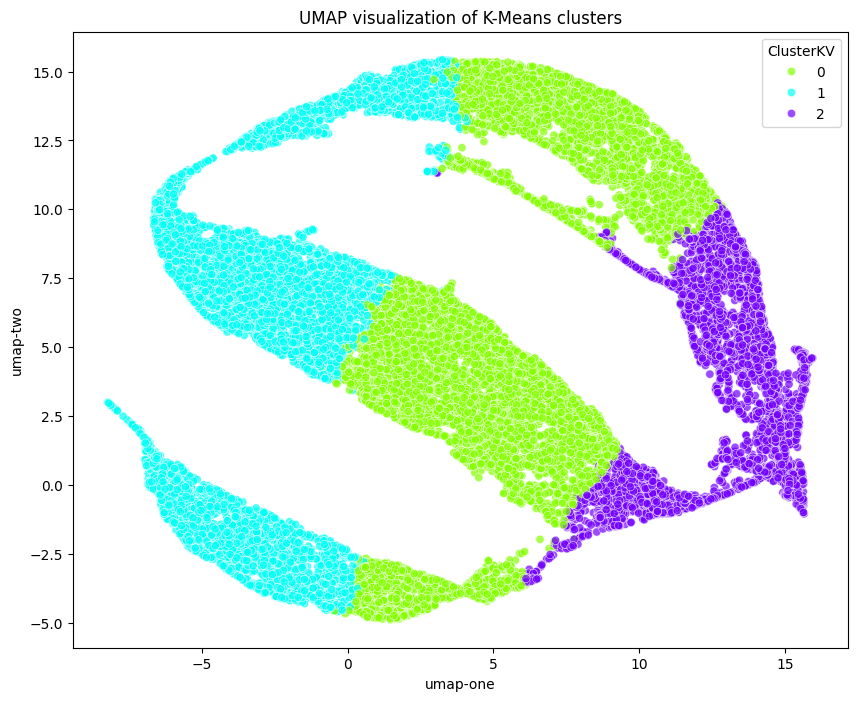

In [108]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue="ClusterKV",
    palette=sns.color_palette("hsv", k),
    data=df_numerical,
    legend="full",
    alpha=0.7
)
plt.title('UMAP visualization of K-Means clusters')
plt.show()

In [109]:
len(main)

28836

In [110]:
main['TextLength'] = main['Text'].apply(lambda x: len(x.split()))

In [111]:
main.describe()

Publish-Year  Average-Rating    AuthorCode  AverageWordLength  \
count  28836.000000    28836.000000  28836.000000       28836.000000   
mean    1873.400090        3.914407      7.883375           5.625329   
std       25.805778        0.252139      4.378727           0.636701   
min     1811.000000        2.780000      0.000000           2.000000   
25%     1861.000000        3.790000      4.000000           5.204145   
50%     1871.000000        3.960000      8.000000           5.681523   
75%     1897.000000        4.090000     12.000000           6.090278   
max     1924.000000        4.290000     15.000000           8.220000   

       AverageSentenceLengthByWord  AverageSyllablePerWord  \
count                 28836.000000            28836.000000   
mean                     20.660614                1.711583   
std                       8.549998                0.188764   
min                       1.133333                1.000000   
25%                      14.866667                1.577465   
50%                      19.733333                1.705165   
75%                      25.400000                1.837838   
max                     331.600000                2.636364   

       SpecialCharactersCount  PunctuationCount  FunctionalWordsCount  \
count            28836.000000      28836.000000          28836.000000   
mean                 0.003154          0.031006              0.120095   
std                  0.004908          0.014442              0.009961   
min                  0.000000          0.000000              0.000000   
25%                  0.000724          0.024609              0.114062   
50%                  0.001927          0.028743              0.120193   
75%                  0.004005          0.034238              0.126251   
max                  0.294118          0.394737              0.183007   

       TypeTokenRatio  ...  SimpsonsIndex  BrunetsMeasureW  ShannonEntropy  \
count    28836.000000  ...   28836.000000     28836.000000    28836.000000   
mean         0.524275  ...       0.924583         5.590406        4.235887   
std          0.056855  ...       0.009854         0.609058        0.107138   
min          0.206099  ...       0.462451         2.149114        1.502394   
25%          0.486760  ...       0.922947         5.179159        4.181034   
50%          0.522638  ...       0.924897         5.550824        4.227413   
75%          0.560284  ...       0.926711         5.949489        4.282520   
max          0.909091  ...       0.952819         9.465489        4.935651   

       FleschReadingEase  FleschKincaidGradeLevel  DaleChallReadability  \
count       28836.000000             28836.000000          28836.000000   
mean           76.280151                 7.148925             23.931230   
std            11.601794                 3.241692              2.361554   
min          -172.770000                -3.100000             17.935973   
25%            69.210000                 4.900000             22.343997   
50%            77.470000                 6.700000             23.657948   
75%            84.270000                 8.900000             25.220282   
max           120.210000               101.300000            107.673633   

         GunningFog  AverageSentenceLengthByChar     Sentiment    TextLength  
count  28836.000000                 28836.000000  28836.000000  28836.000000  
mean       9.377539                   114.316212      0.079517    309.422805  
std        3.312991                    48.676561      0.111501    128.174335  
min        0.400000                     1.600000     -1.000000      6.000000  
25%        7.047500                    81.600000      0.012537    223.000000  
50%        8.900000                   108.666667      0.078928    296.000000  
75%       11.180000                   140.866667      0.147750    380.000000  
max      104.650000                  1862.866667      1.000000   4974.000000  

[8 rows x 25 columns]

In [112]:
total = main['TextLength'].sum()
print("Total:", total)

Total: 8922516
